In [643]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from scipy import stats
import seaborn as sns

from tensorflow import keras
Sequential = tf.keras.models.Sequential

Bidirectional = tf.keras.layers.Bidirectional
LSTM = tf.keras.layers.LSTM
Dropout = tf.keras.layers.Dropout
Dense = tf.keras.layers.Dense

In [644]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [645]:
df = pd.read_csv(
   'bird.csv'
)

df.shape
df = df.dropna()


In [646]:
df.head(100)


id    huml  humw   ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw  \
0    0   80.78  6.68   72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84   
1    1   88.91  6.63   80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01   
2    2   79.97  6.37   69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34   
3    3   77.65  5.70   65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41   
4    4   62.80  4.84   52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13   
..  ..     ...   ...     ...    ...    ...   ...    ...   ...    ...   ...   
95  95   72.17  3.94   74.39   3.56  24.29  1.83  50.64  2.32  28.40  2.20   
96  96  103.14  5.92  103.65   4.78  38.80  3.41  75.54  3.47  42.89  3.12   
97  97  107.41  5.69  110.50   5.32  40.62  3.15  81.86  3.71  44.62  2.95   
98  98   68.06  3.76   69.61   3.20  25.01  2.05  51.08  2.58  27.19  2.00   
99  99   65.71  3.81   68.64   3.36  24.55  1.97  48.94  1.94  28.10  2.25   

   type  
0    SW  
1    SW  
2    SW  
3    SW  
4    SW  
..  ...  
95   SW  
96   SW  
97   SW  
98   SW  
99   SW  

[100 rows x 12 columns]

In [647]:
df.shape

(413, 12)

In [648]:
# Assuming df is your DataFrame
described = df.describe()
for col in described.columns:
    described[col] = described[col].apply(int)
described



id  huml  humw  ulnal  ulnaw  feml  femw  tibl  tibw  tarl  tarw
count  413   413   413    413    413   413   413   413   413   413   413
mean   207    64     4     69      3    36     3    64     3    39     2
std    121    54     2     58      2    19     2    37     2    23     2
min      0     9     1     14      1    11     0     5     0     7     0
25%    103    25     2     28      1    21     1    36     1    23     1
50%    209    44     3     43      2    31     2    51     2    31     2
75%    312    90     5     97      4    47     4    82     4    50     3
max    419   420    17    422     12   117    11   240    11   175    14

In [649]:
df.head(10)

id    huml   humw   ulnal  ulnaw   feml  femw    tibl  tibw   tarl  tarw  \
0   0   80.78   6.68   72.01   4.88  41.81  3.70    5.50  4.03  38.70  3.84   
1   1   88.91   6.63   80.53   5.59  47.04  4.30   80.22  4.51  41.50  4.01   
2   2   79.97   6.37   69.26   5.28  43.07  3.90   75.35  4.04  38.31  3.34   
3   3   77.65   5.70   65.76   4.77  40.04  3.52   69.17  3.40  35.78  3.41   
4   4   62.80   4.84   52.09   3.73  33.95  2.72   56.27  2.96  31.88  3.13   
5   5   61.92   4.78   50.46   3.47  49.52  4.41   56.95  2.73  29.07  2.83   
6   6   79.73   5.94   67.39   4.50  42.07  3.41   71.26  3.56  37.22  3.64   
7   7   86.98   5.68   74.52   4.55  44.46  3.78   76.02  3.81  37.94  3.81   
8   8  118.20   7.82  116.64   6.13  59.33  5.45  110.00  5.58  61.62  4.37   
9   9  145.00  10.42  144.00   7.05  70.96  7.44  120.00  7.31  78.67  6.34   

  type  
0   SW  
1   SW  
2   SW  
3   SW  
4   SW  
5   SW  
6   SW  
7   SW  
8   SW  
9   SW

In [650]:
df.nunique()

id       413
huml     403
humw     319
ulnal    394
ulnaw    305
feml     397
femw     287
tibl     401
tibw     283
tarl     403
tarw     277
type       6
dtype: int64

In [651]:
unique_activities = df['type'].unique()
print(unique_activities)

['SW' 'W' 'T' 'R' 'P' 'SO']


Each bird has a label for its ecological group:




*   SW: Swimming Birds
*   W: Wading Birds
*   T: Terrestrial Birds
*   R: Raptors
*   P: Scansorial Birds
*   SO: Singing Birds


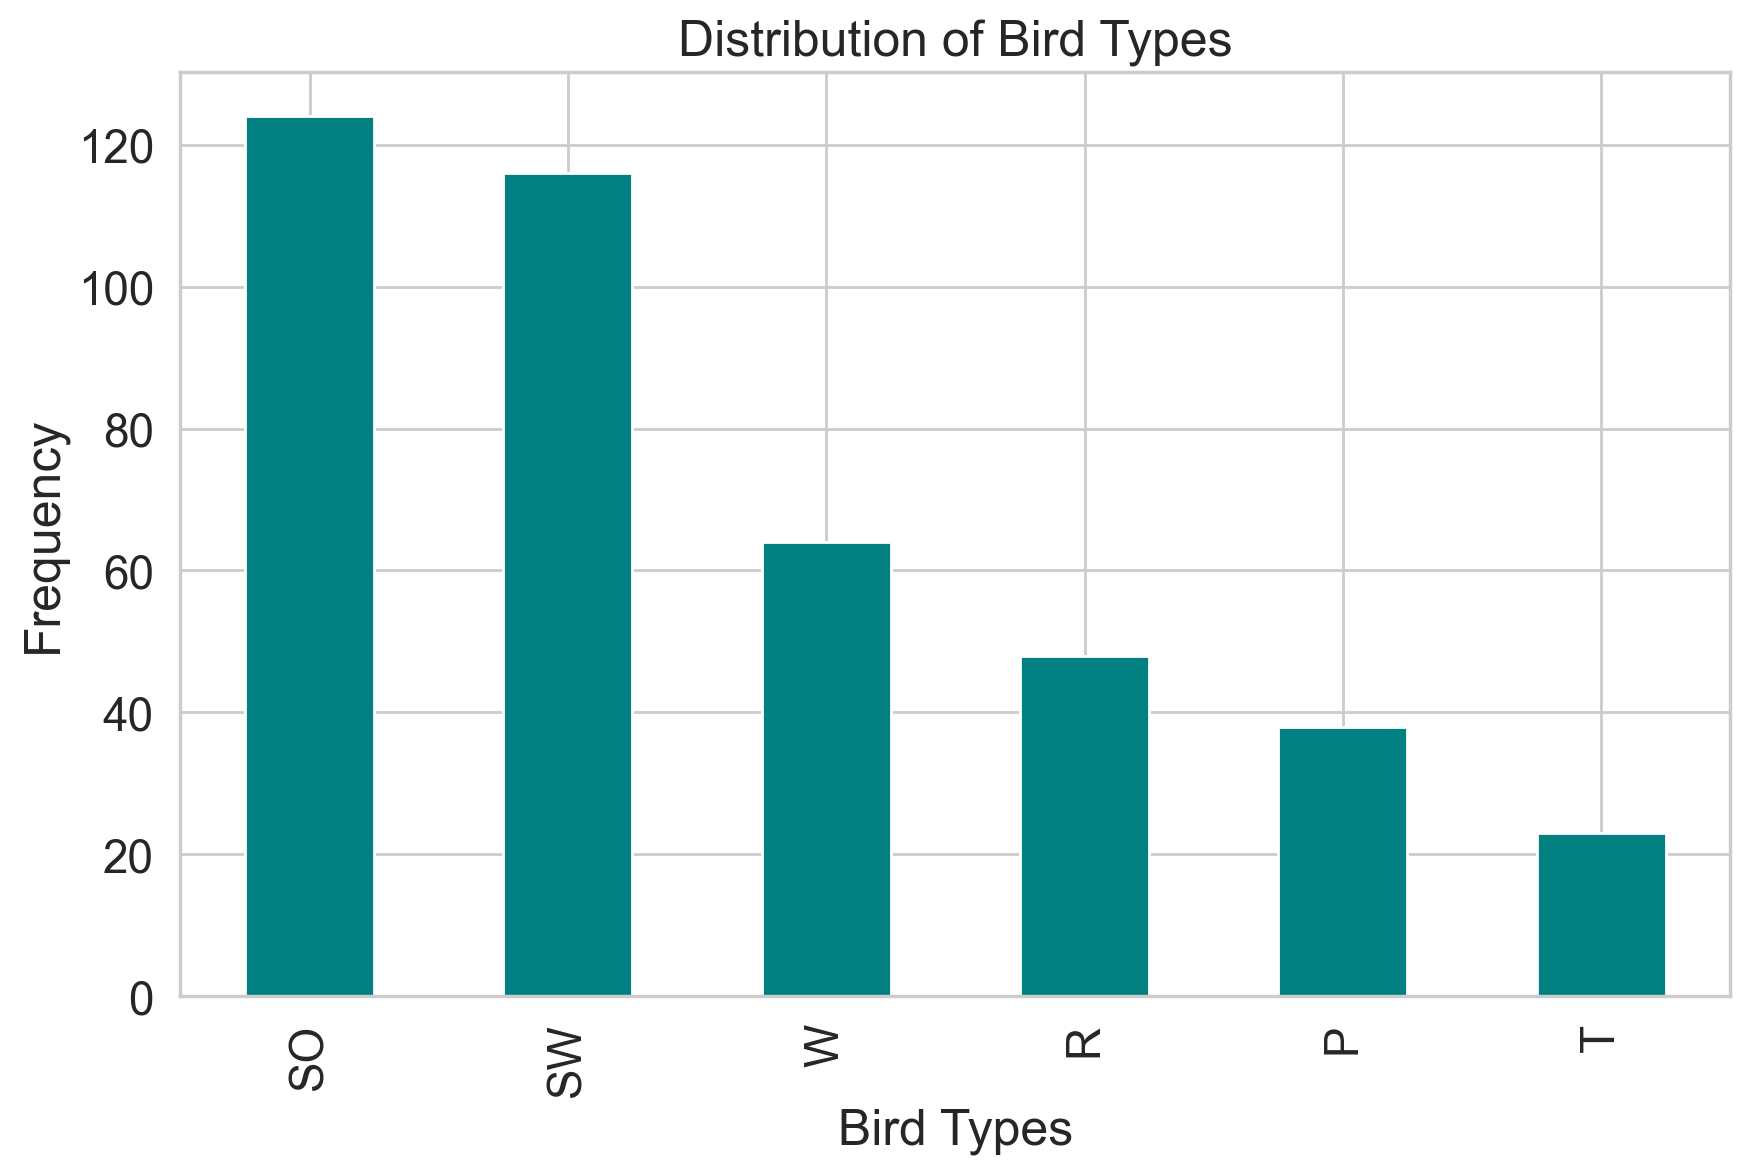

In [652]:
# Counting the occurrences of each Bird types
type_counts = df['type'].value_counts()

# Plotting the distribution of activities
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='teal')
plt.title('Distribution of Bird Types')
plt.xlabel('Bird Types')
plt.ylabel('Frequency')
plt.show()

In [653]:
def plot_activity(type, df):
    data = df[df['type'] == type][['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']]
    axis = data.plot(subplots=True, figsize=(16, 12),
                     title=type)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

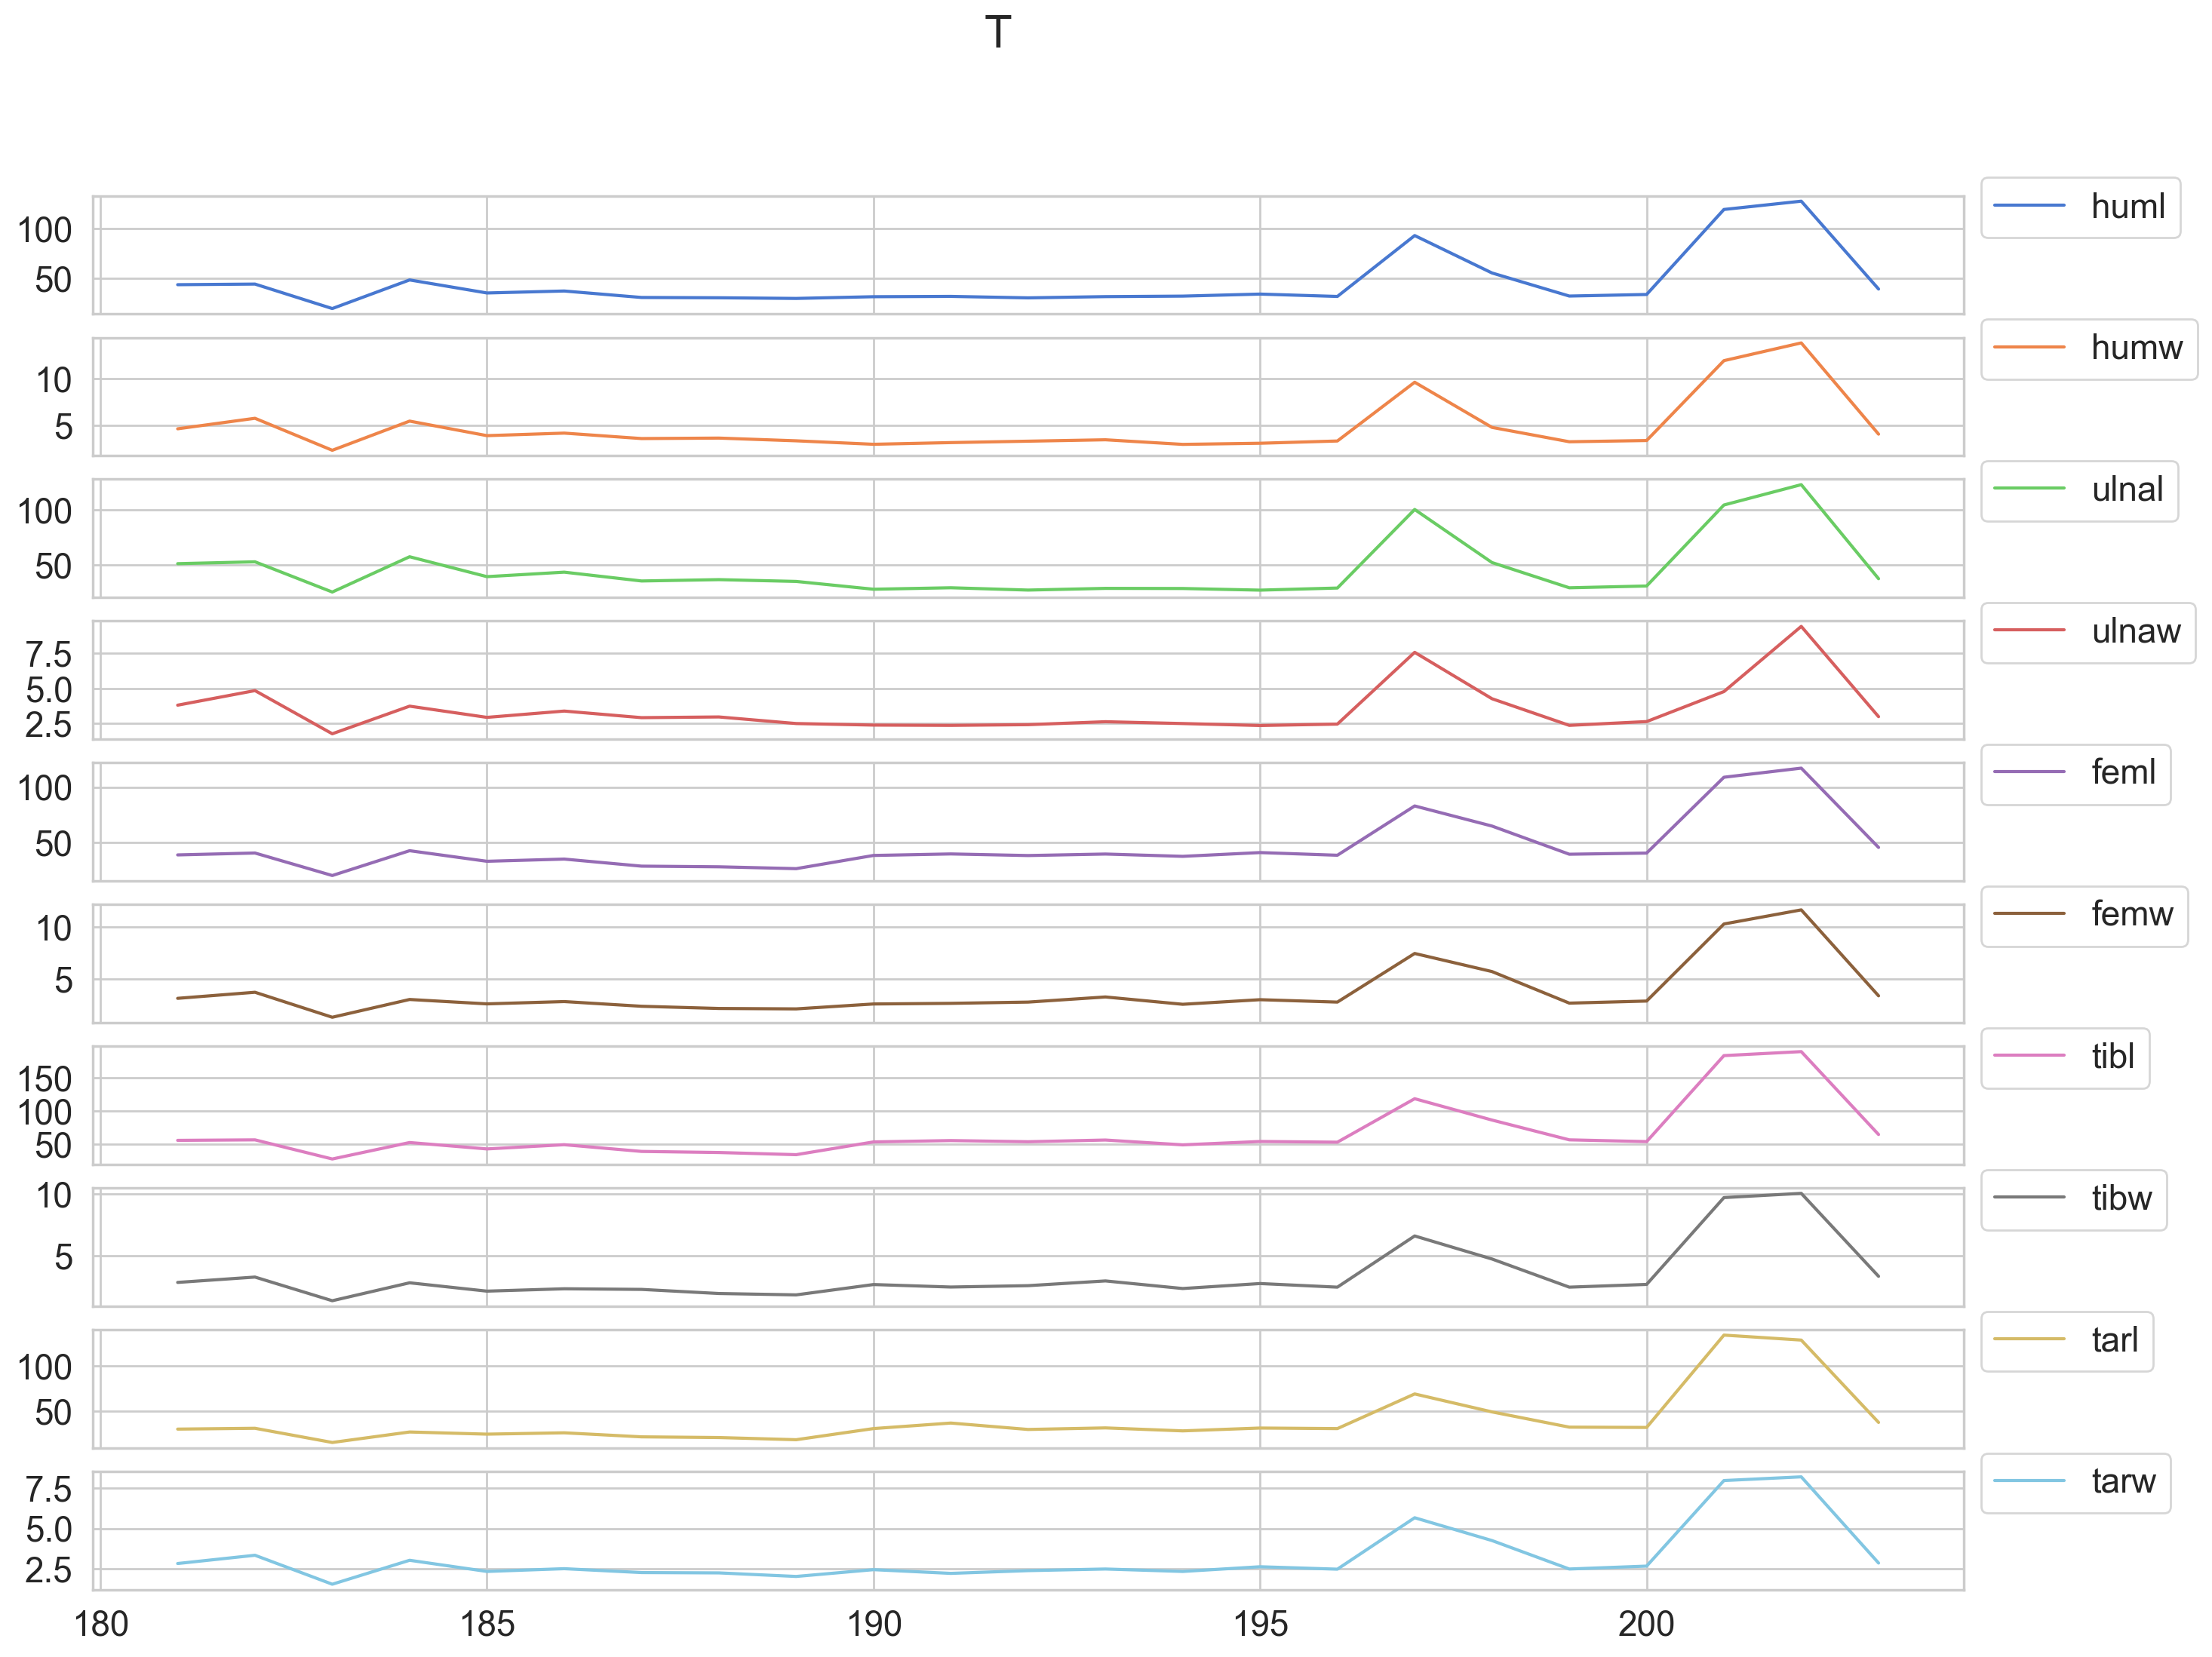

In [654]:
plot_activity("T", df);

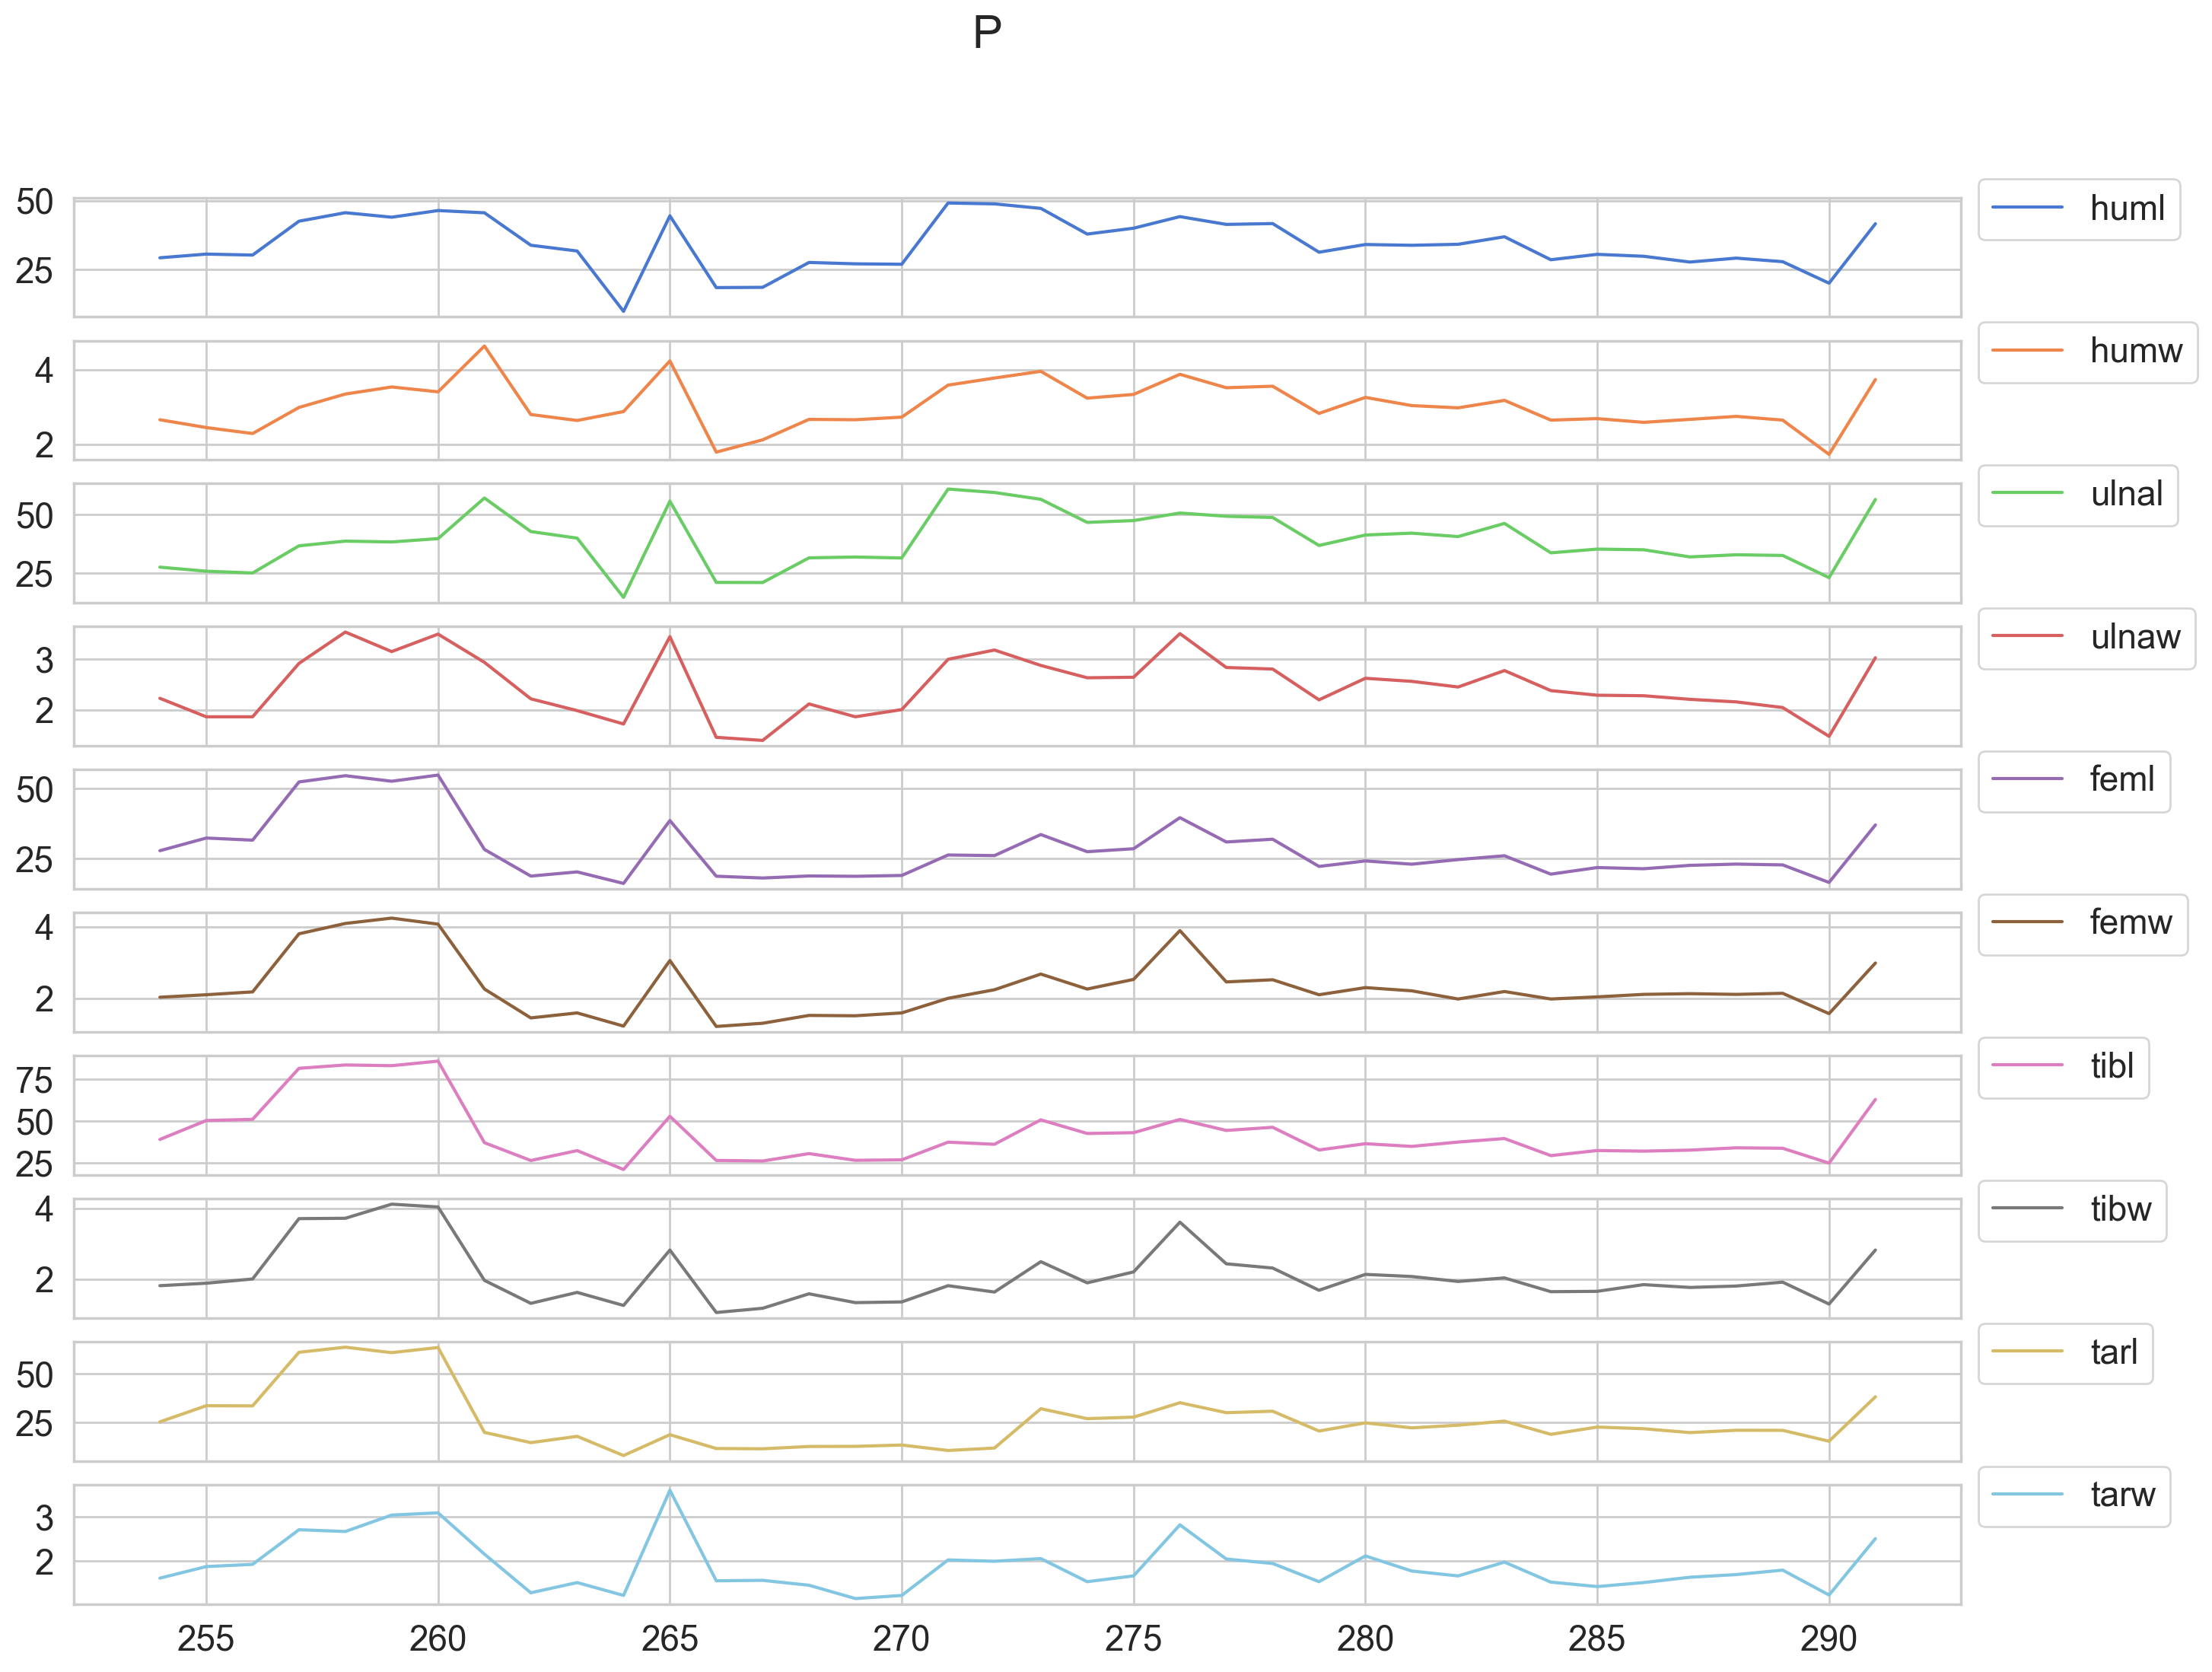

In [655]:
plot_activity("P", df);

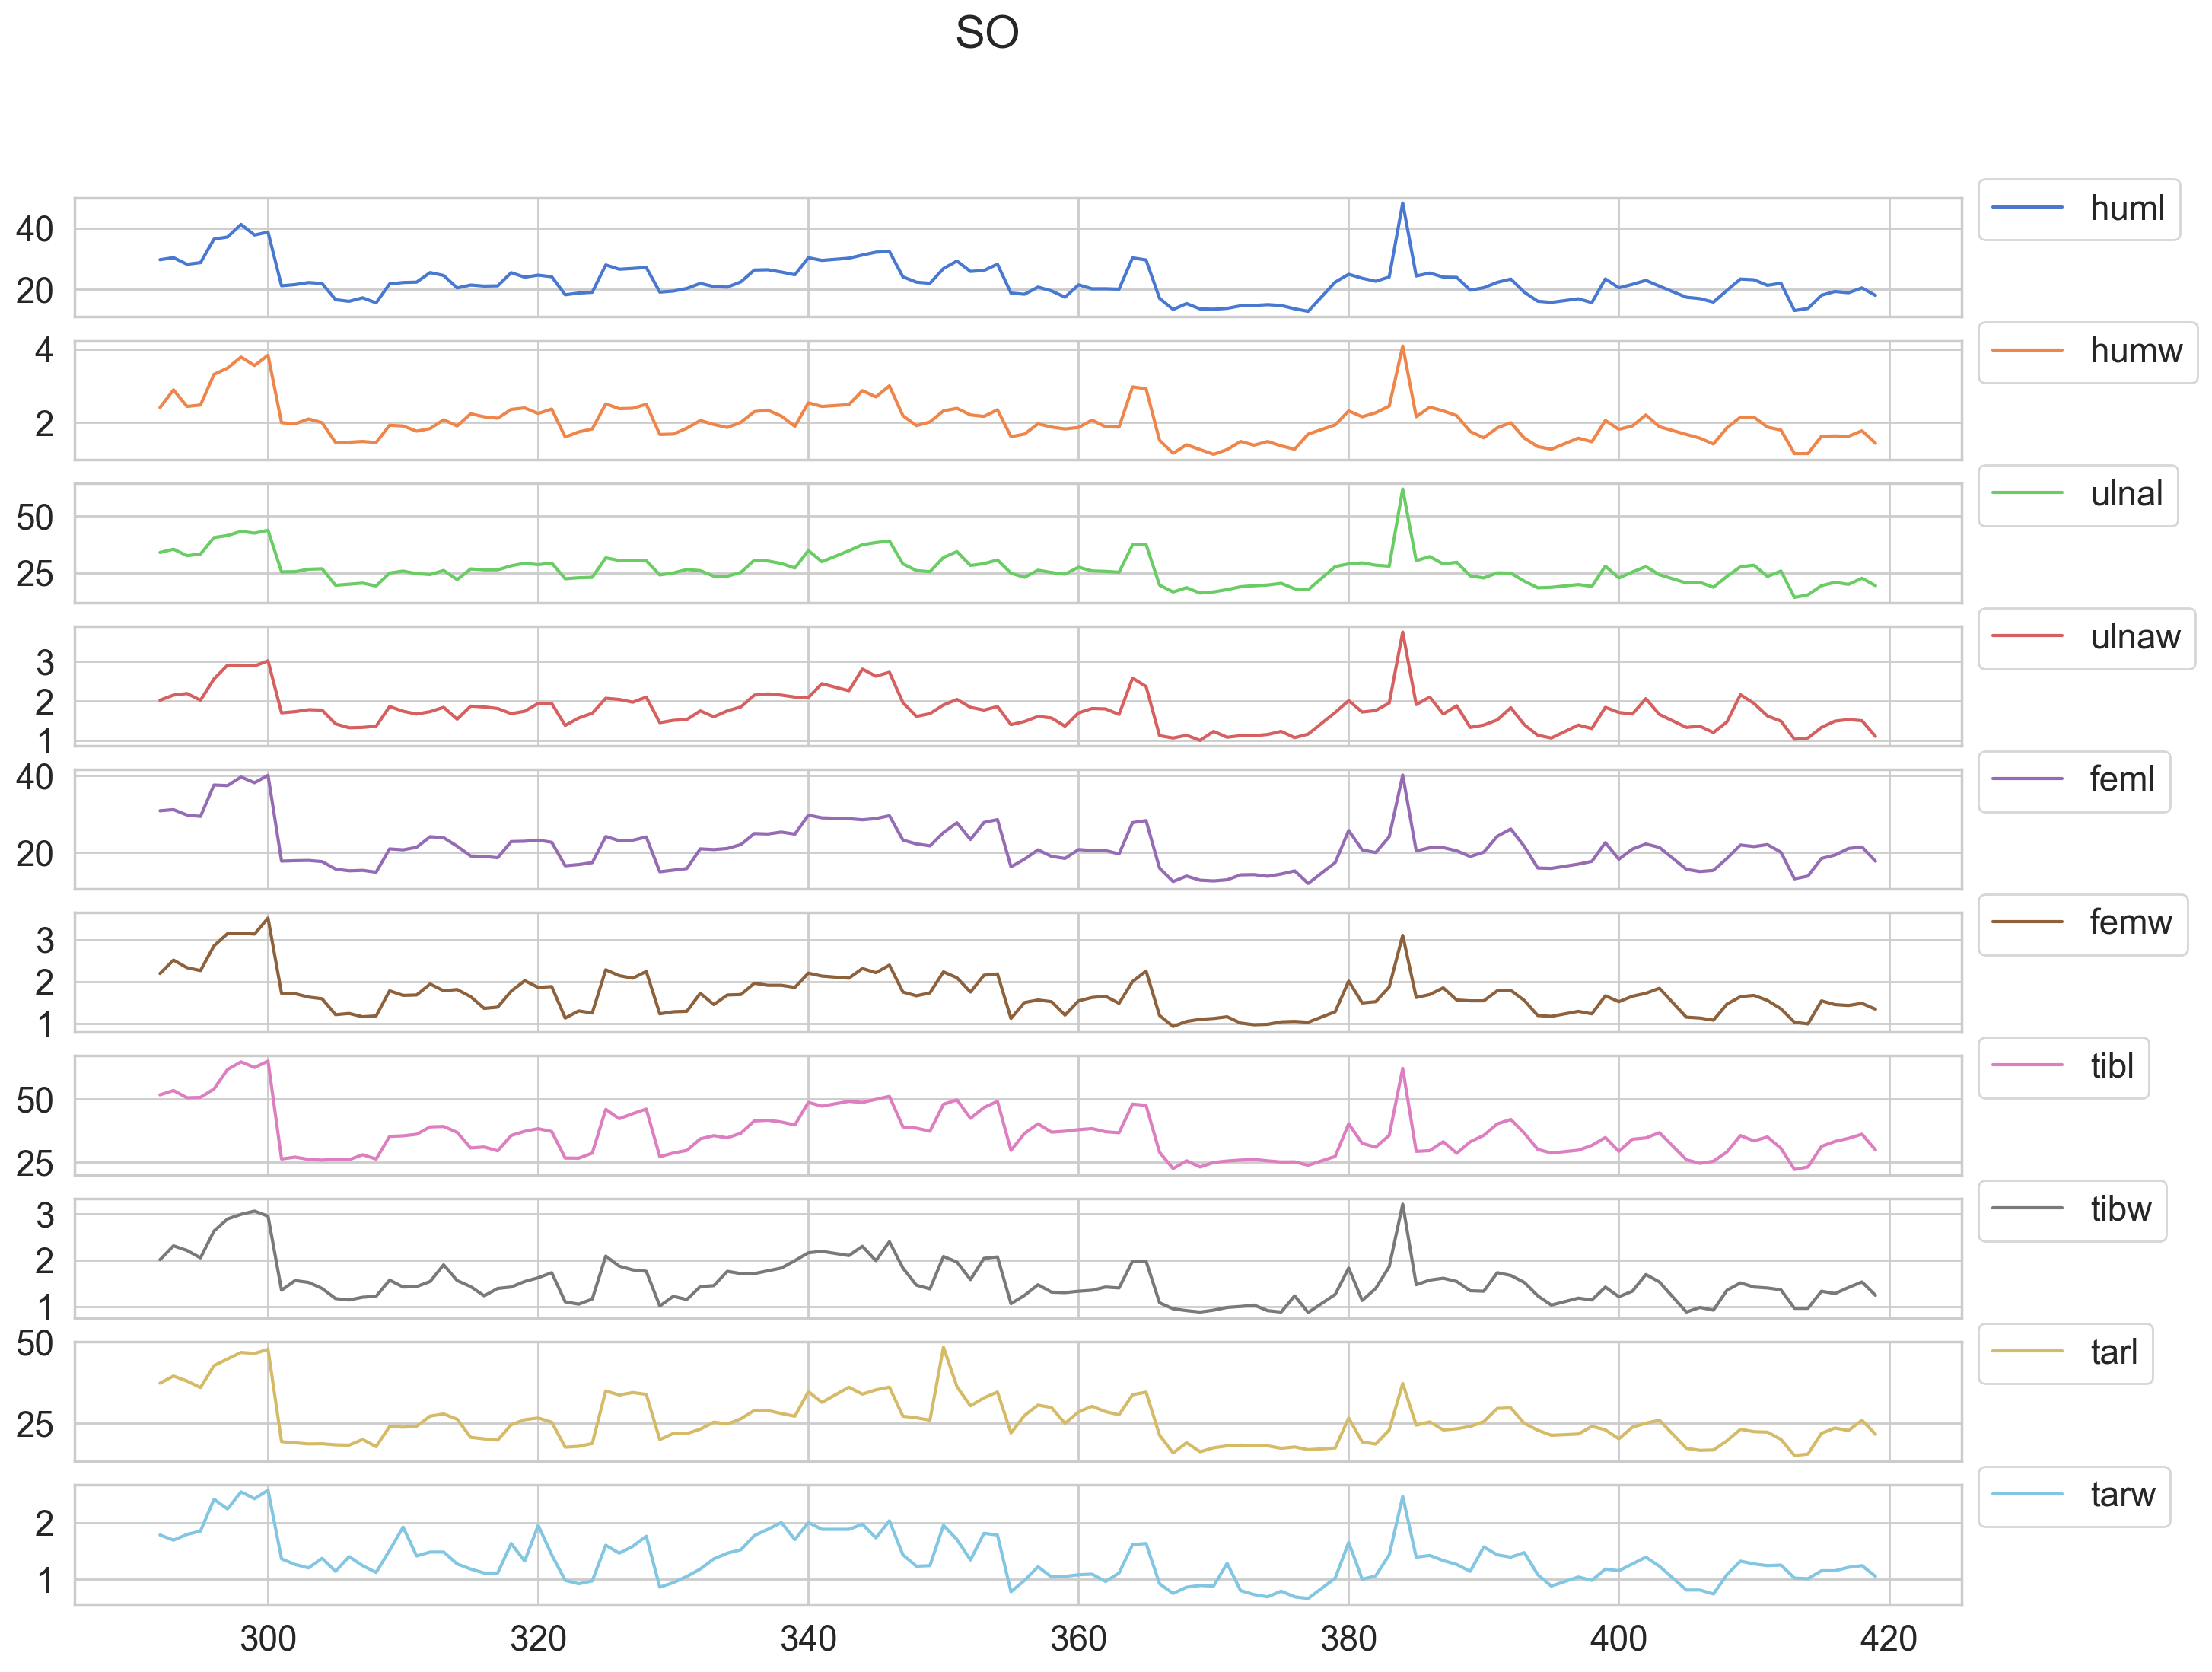

In [656]:
plot_activity("SO", df);

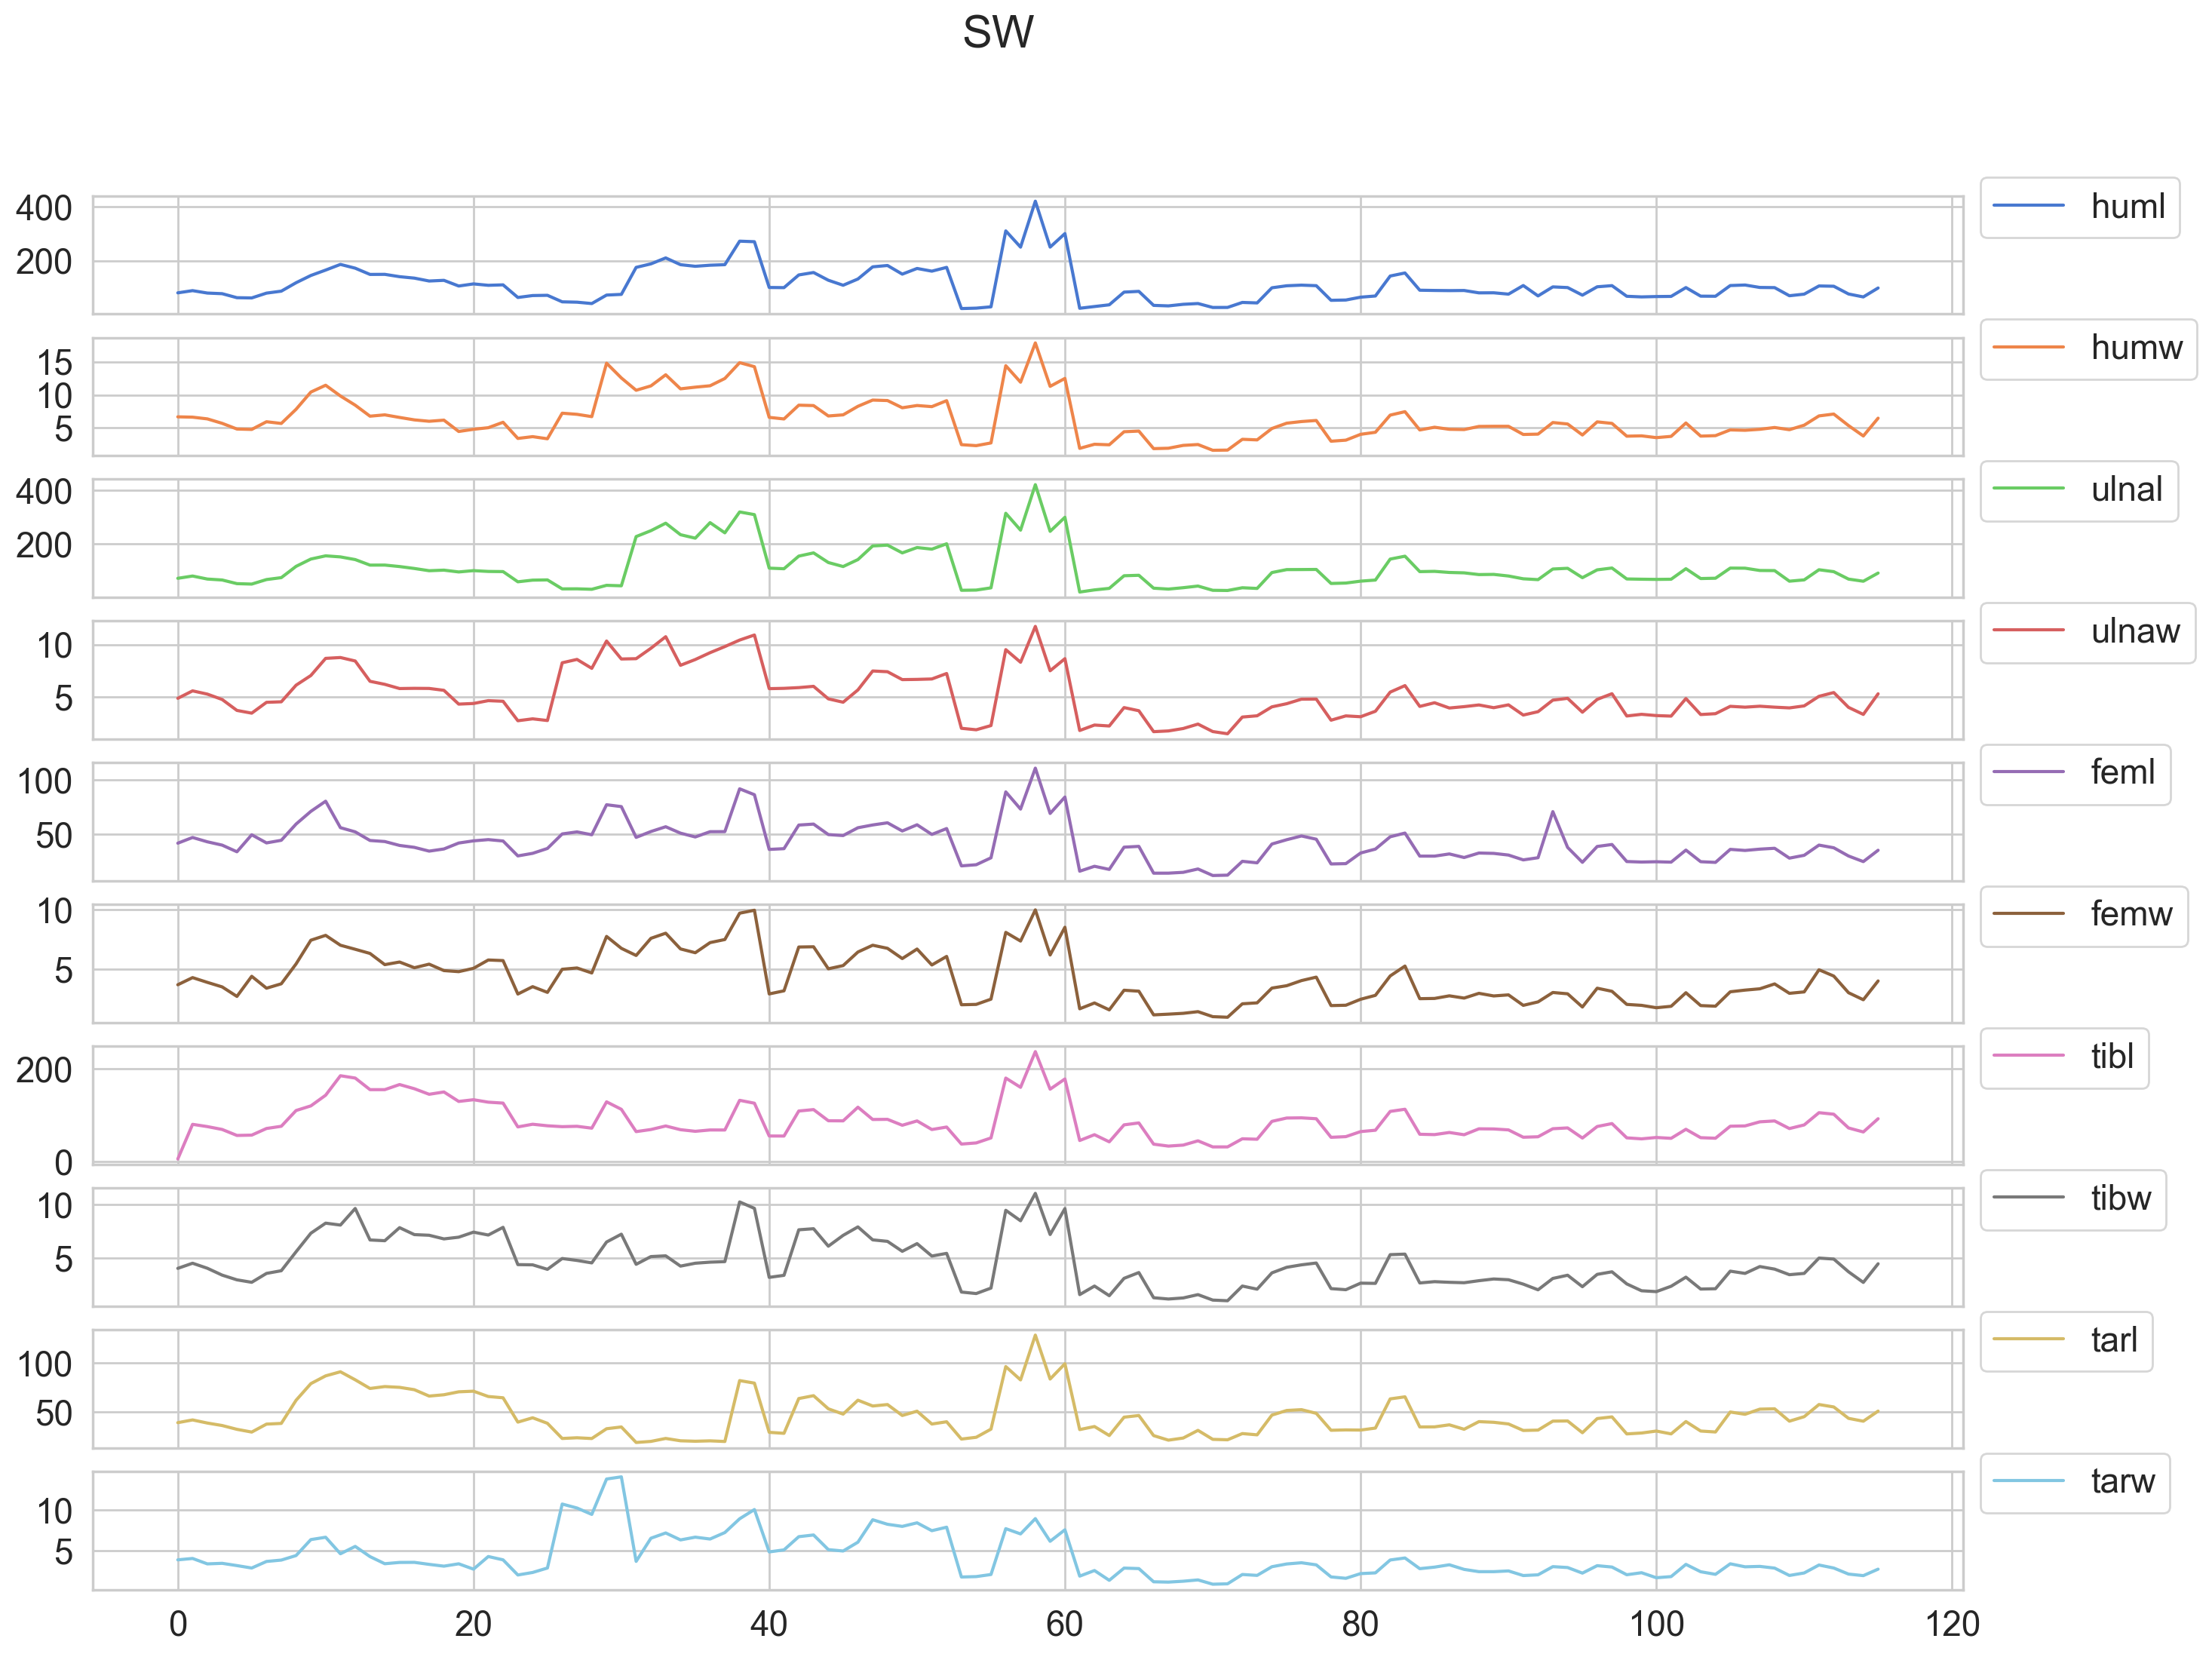

In [657]:
plot_activity("SW", df);

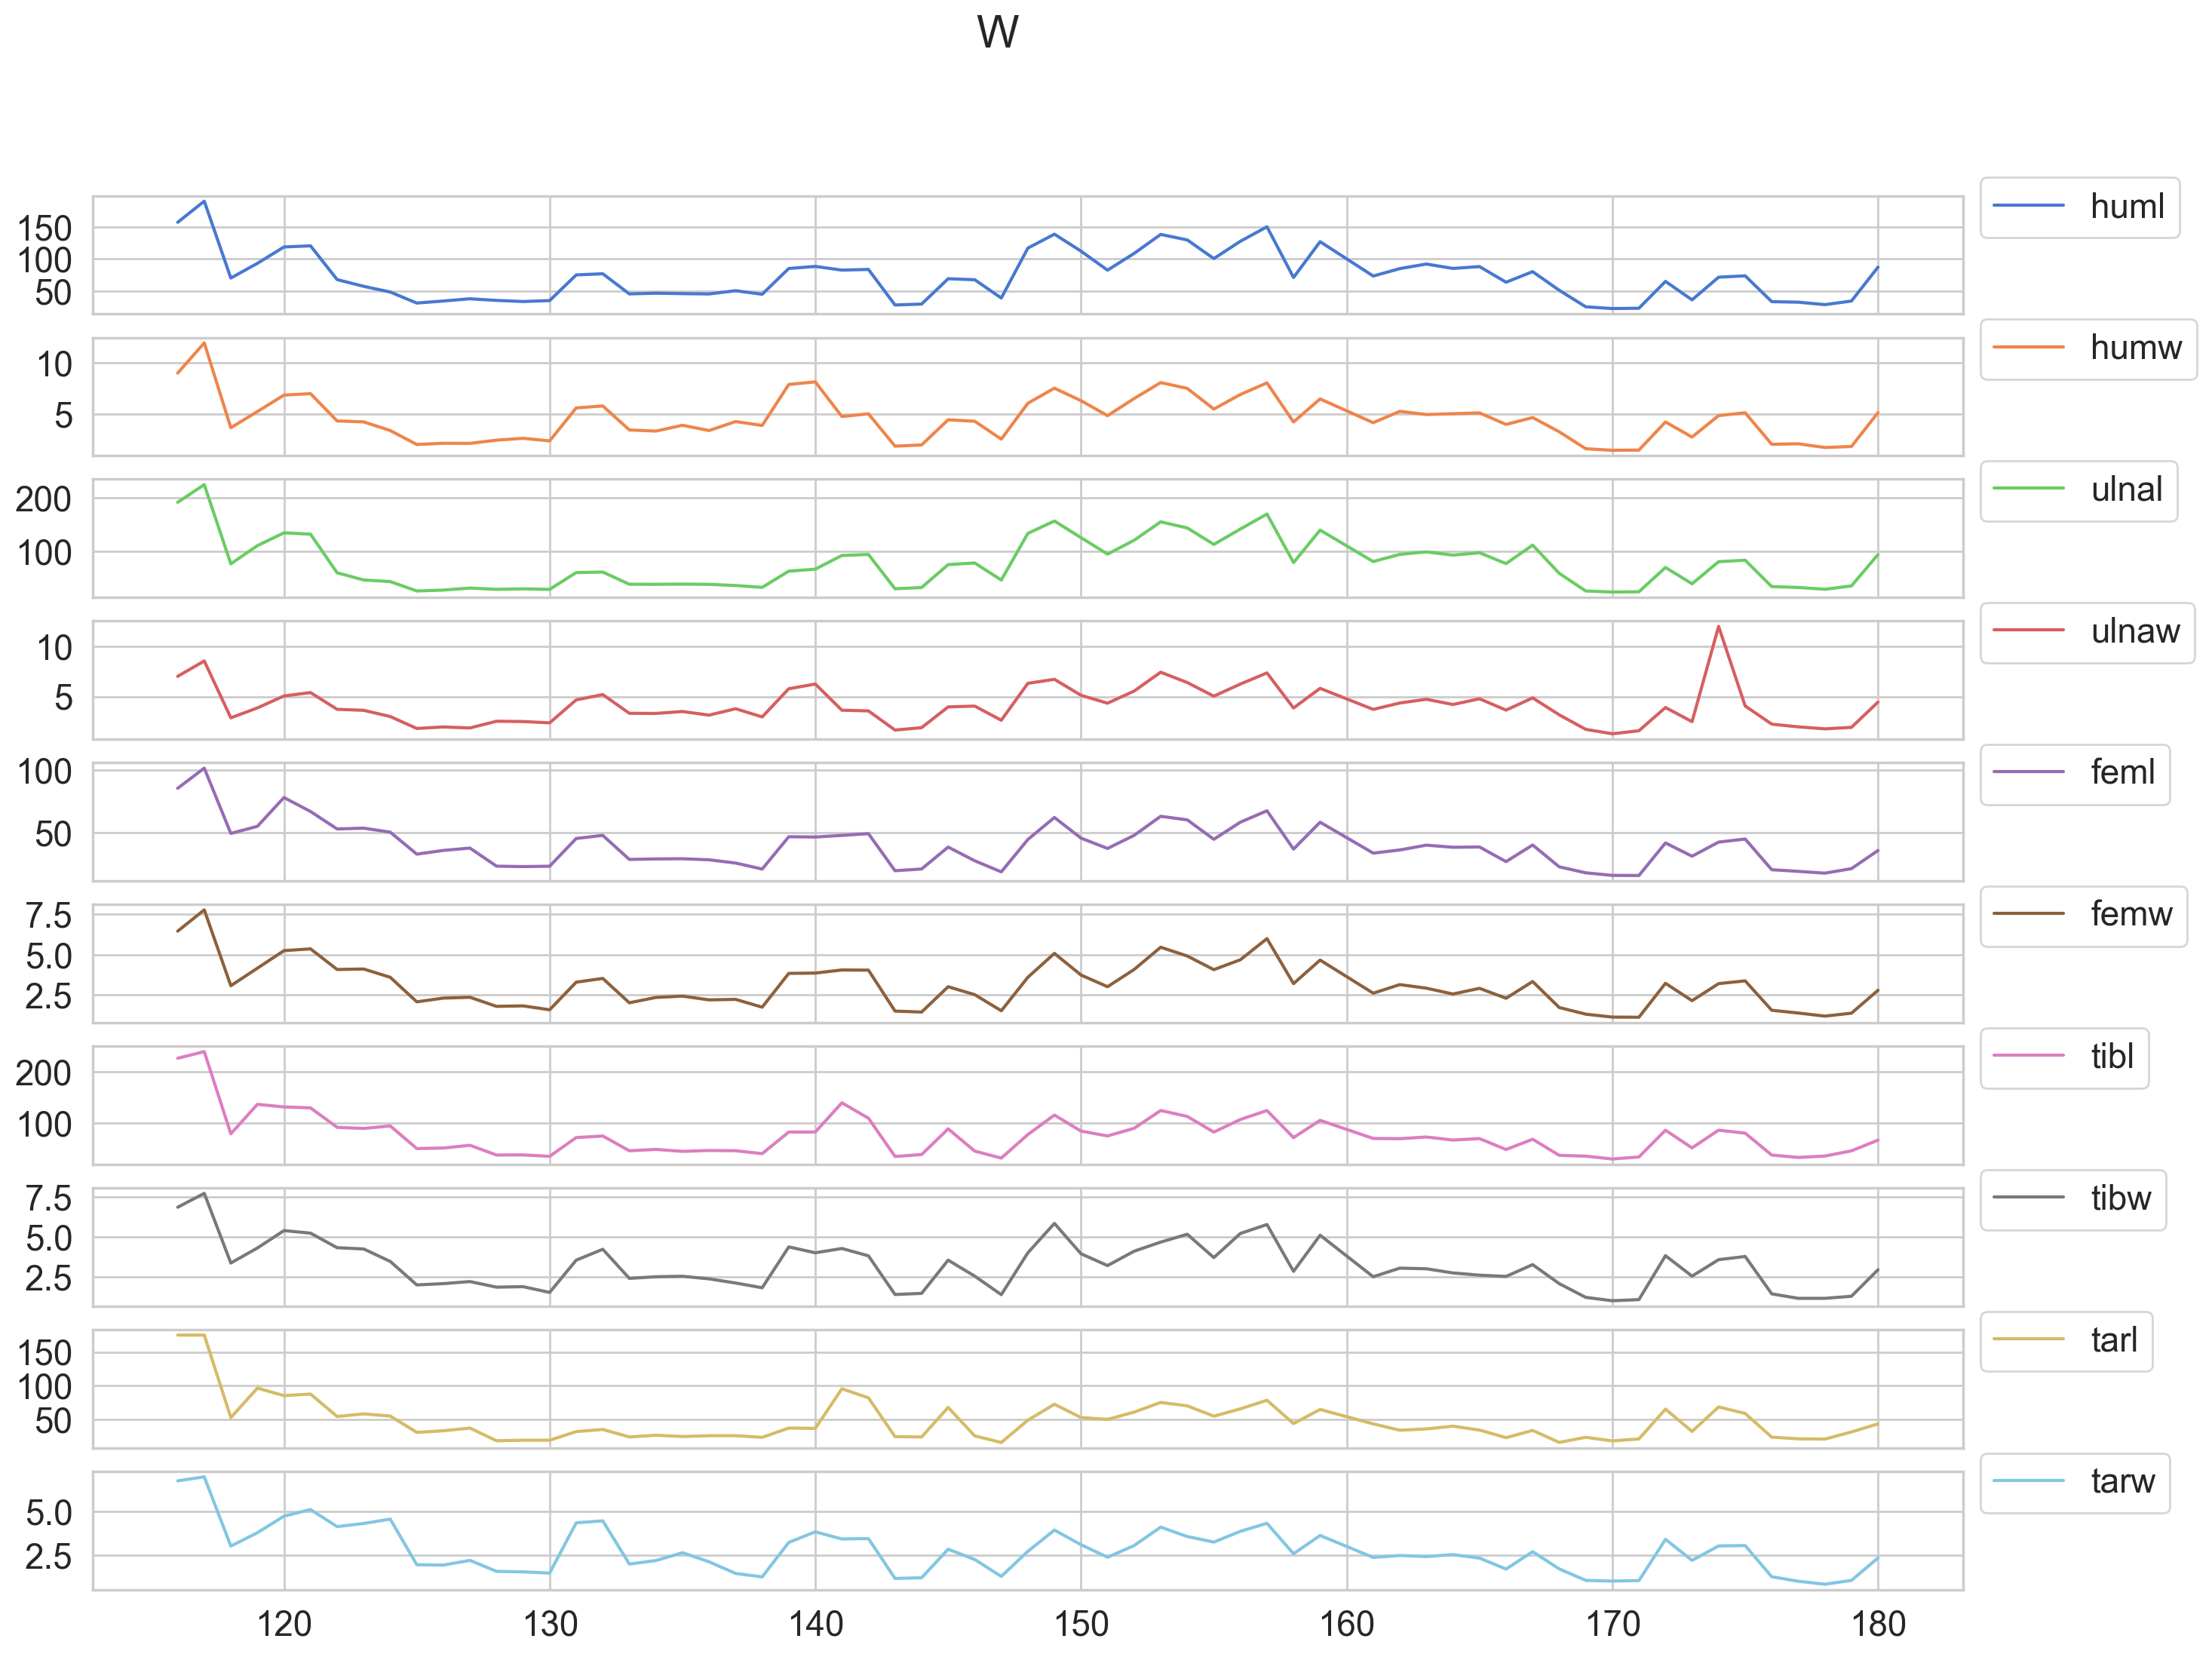

In [658]:
plot_activity("W", df);

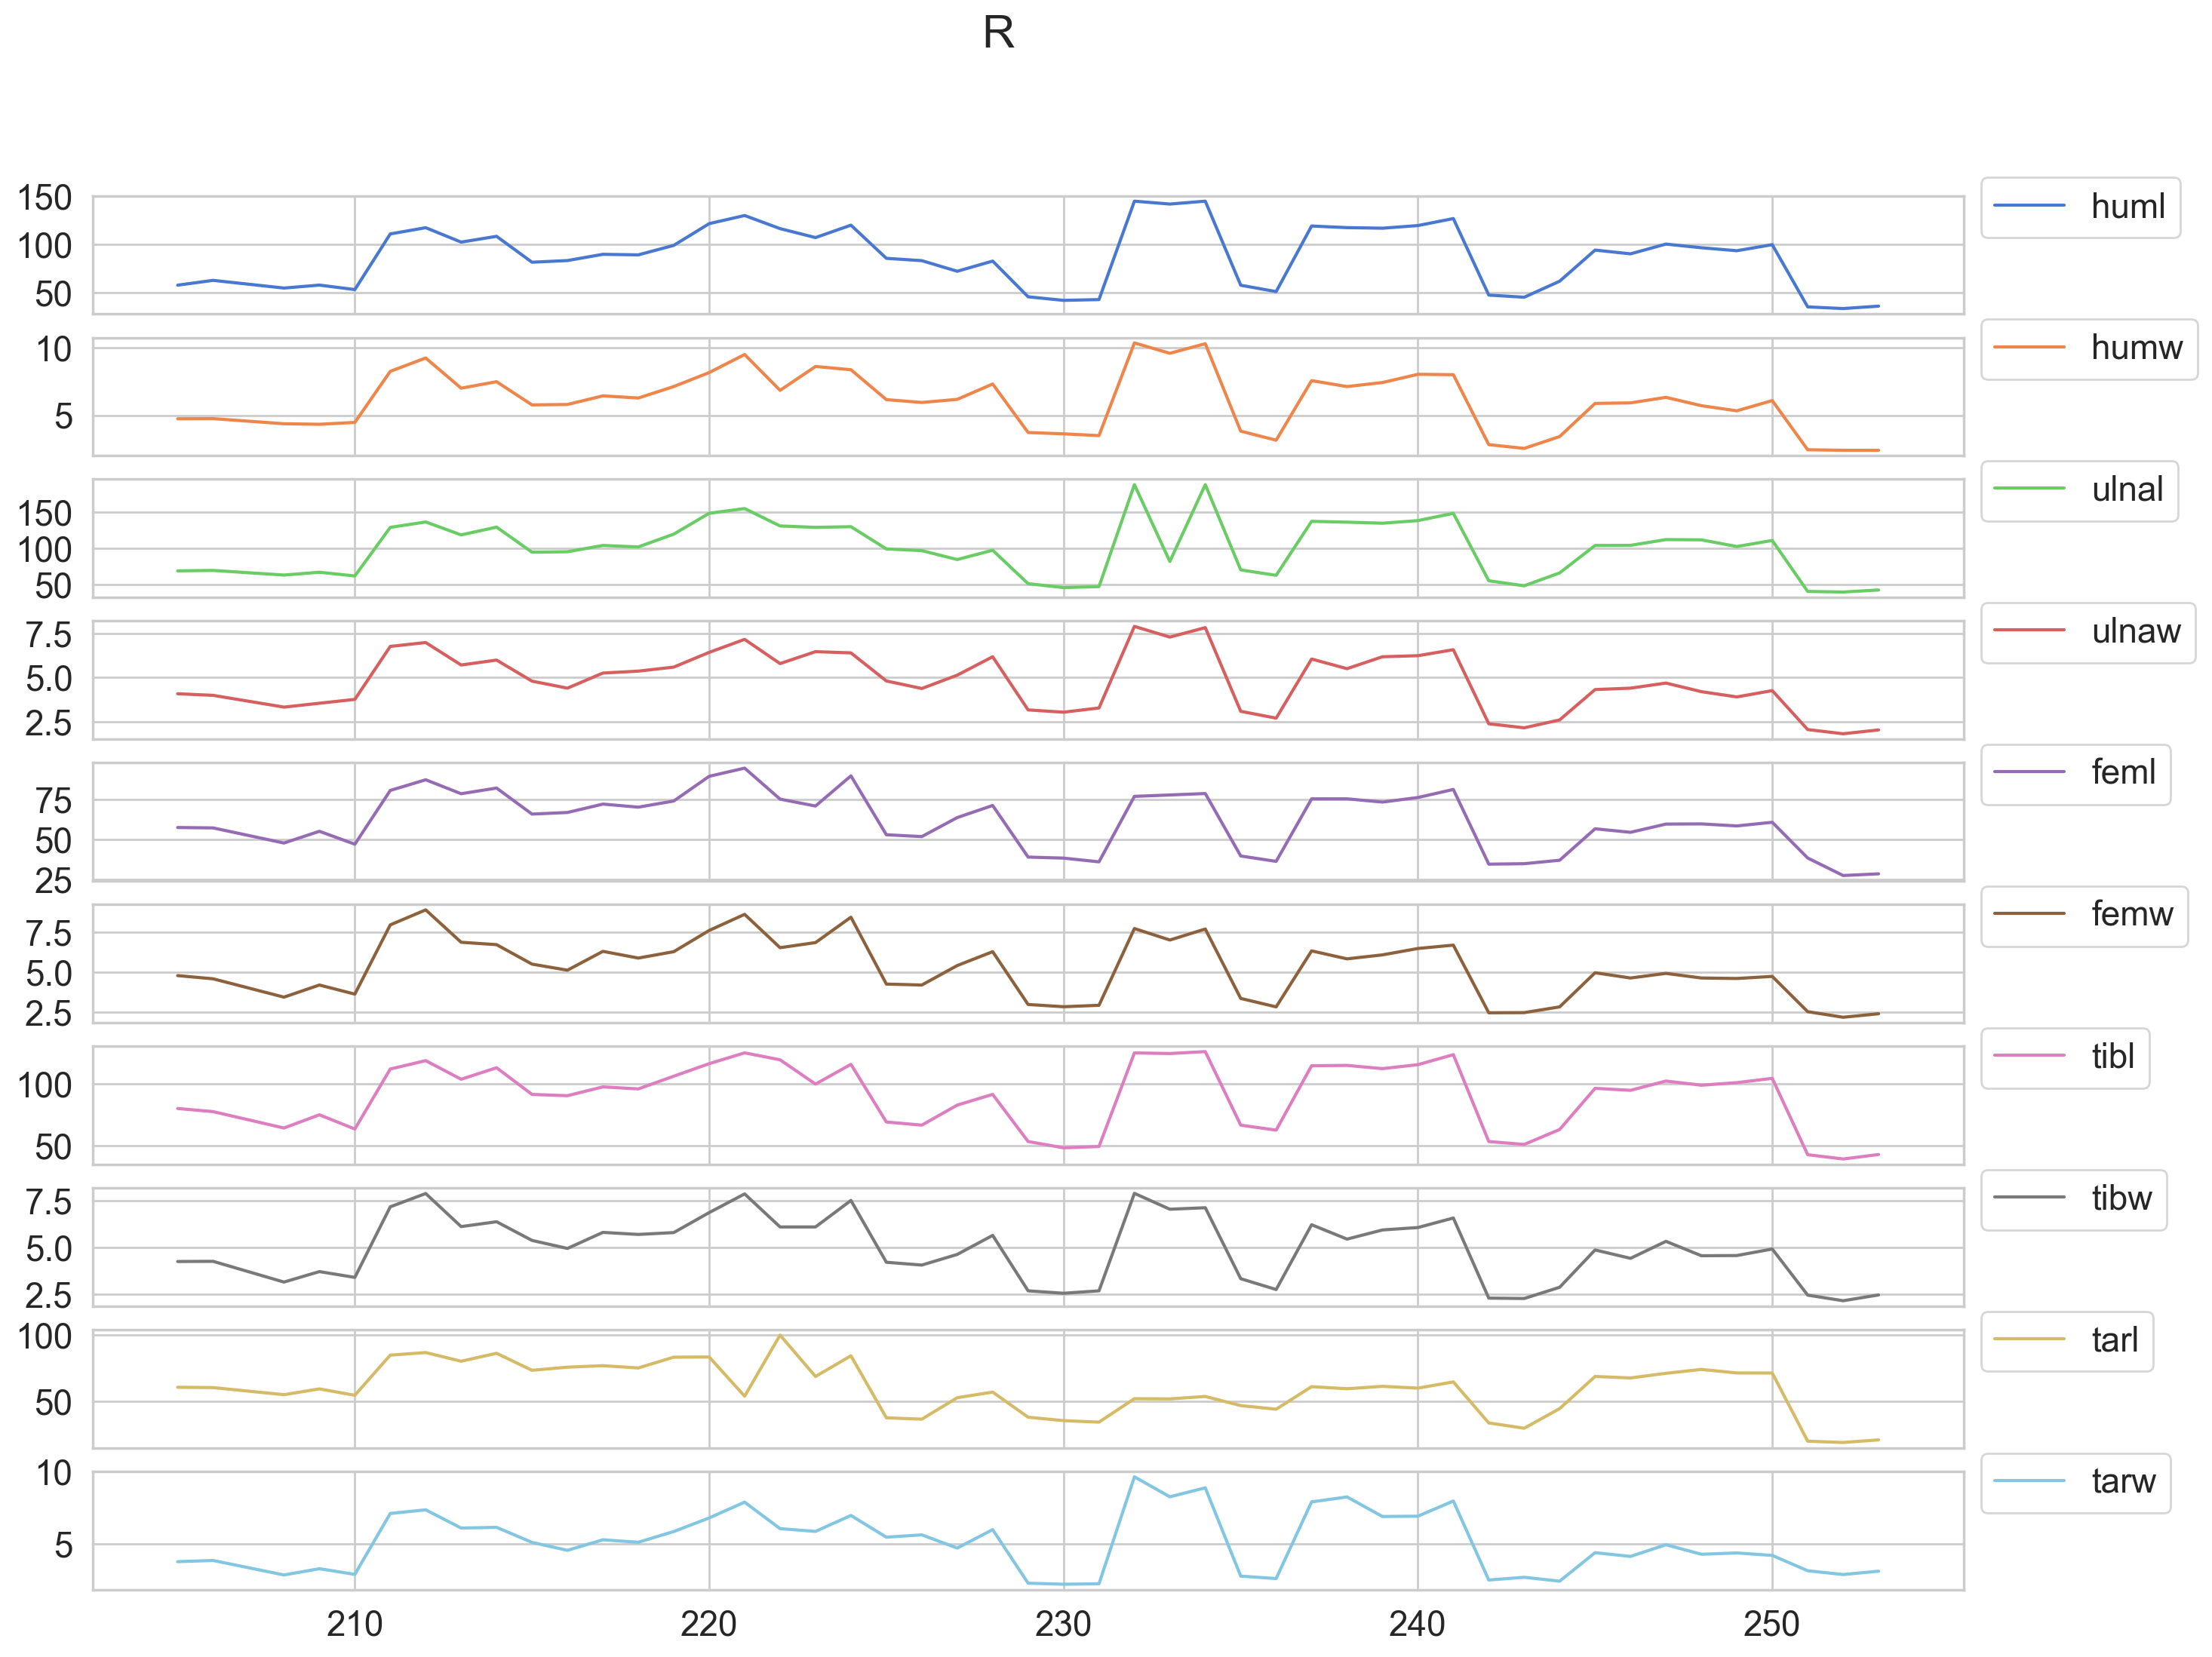

In [659]:
plot_activity("R", df);

In [660]:
#needs refactoring

# Check if the 'activity' column in the DataFrame 'df' is of type 'object'
if df['type'].dtype == 'object':
    # If true, convert the 'activity' column to a categorical type
    # This is done to save memory and improve performance for columns with a limited number of unique values
    # The 'astype('category')' method changes the data type of the 'activity' column to 'category'
    # The 'cat.codes' attribute then converts the categorical data into an array of codes, which are integer representations of the categories
    df['type'] = df['type'].astype('category').cat.codes

# Display the first few rows of the DataFrame to verify the changes
df.head(200)


id   huml  humw   ulnal  ulnaw   feml  femw    tibl  tibw   tarl  tarw  \
0      0  80.78  6.68   72.01   4.88  41.81  3.70    5.50  4.03  38.70  3.84   
1      1  88.91  6.63   80.53   5.59  47.04  4.30   80.22  4.51  41.50  4.01   
2      2  79.97  6.37   69.26   5.28  43.07  3.90   75.35  4.04  38.31  3.34   
3      3  77.65  5.70   65.76   4.77  40.04  3.52   69.17  3.40  35.78  3.41   
4      4  62.80  4.84   52.09   3.73  33.95  2.72   56.27  2.96  31.88  3.13   
..   ...    ...   ...     ...    ...    ...   ...     ...   ...    ...   ...   
196  196  32.28  3.34   28.79   2.45  38.46  2.82   52.93  2.50  30.97  2.48   
197  197  92.82  9.60  100.58   7.57  82.94  7.47  118.24  6.61  69.16  5.66   
198  198  55.62  4.79   52.09   4.26  64.80  5.74   86.17  4.76  49.37  4.25   
199  199  32.68  3.26   29.02   2.36  39.38  2.72   56.45  2.50  32.56  2.49   
200  200  34.24  3.39   30.65   2.63  40.41  2.92   53.77  2.72  32.24  2.67   

     type  
0       3  
1       3  
2       3  
3       3  
4       3  
..    ...  
196     4  
197     4  
198     4  
199     4  
200     4  

[200 rows x 12 columns]

In [661]:
df.head(400)

id   huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw  \
0      0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84   
1      1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01   
2      2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34   
3      3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41   
4      4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13   
..   ...    ...   ...    ...    ...    ...   ...    ...   ...    ...   ...   
401  401  21.53  1.91  25.30   1.67  20.80  1.65  34.08  1.33  23.86  1.27   
402  402  22.84  2.21  27.70   2.06  22.13  1.72  34.60  1.69  25.08  1.39   
403  403  20.95  1.89  24.12   1.66  21.24  1.84  36.71  1.53  25.99  1.23   
405  405  17.30  1.68  20.43   1.33  15.51  1.15  25.96  0.88  17.41  0.81   
406  406  16.86  1.58  20.72   1.36  14.92  1.13  24.56  0.98  16.76  0.81   

     type  
0       3  
1       3  
2       3  
3       3  
4       3  
..    ...  
401     2  
402     2  
403     2  
405     2  
406     2  

[400 rows x 12 columns]

In [662]:
type_counts

type
SO    124
SW    116
W      64
R      48
P      38
T      23
Name: count, dtype: int64

In [663]:
unique_activities = df['type'].unique()
print(unique_activities)

[3 5 4 1 0 2]


In [664]:
df = df.sort_values(by=['id', 'type'])

# Create a new column 'activity_shifted' to hold the previous row's activity value
df['type_shifted'] = df['type'].shift(1)

# Create a new column 'user_shifted' to hold the previous row's user_id value
df['id_shifted'] = df['id'].shift(1)

# Identify changes in activity or user_id
df['type_change'] = (df['type'] != df['type_shifted']) | (df['id'] != df['id_shifted'])

# Cumulatively sum the changes to create a group identifier for each sequence of the same activity
df['type_block'] = df['type_change'].cumsum()

# Count the number of entries in each activity block
type_counts = df.groupby(['id', 'type', 'type_block']).size().reset_index(name='count')

# Drop the 'activity_block' as it's no longer needed beyond counting
type_counts = type_counts.drop(columns='type_block')

# Show the DataFrame
df.to_csv('dataframe.csv', index=False)
type_counts.to_csv('acounts.csv', index=False)

C:\Users\ardon\AppData\Local\Temp\ipykernel_18096\3985417440.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'id',
C:\Users\ardon\AppData\Local\Temp\ipykernel_18096\3985417440.py:1: UserWarning: 
The palette list has fewer values (1) than needed (413) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = 'id',


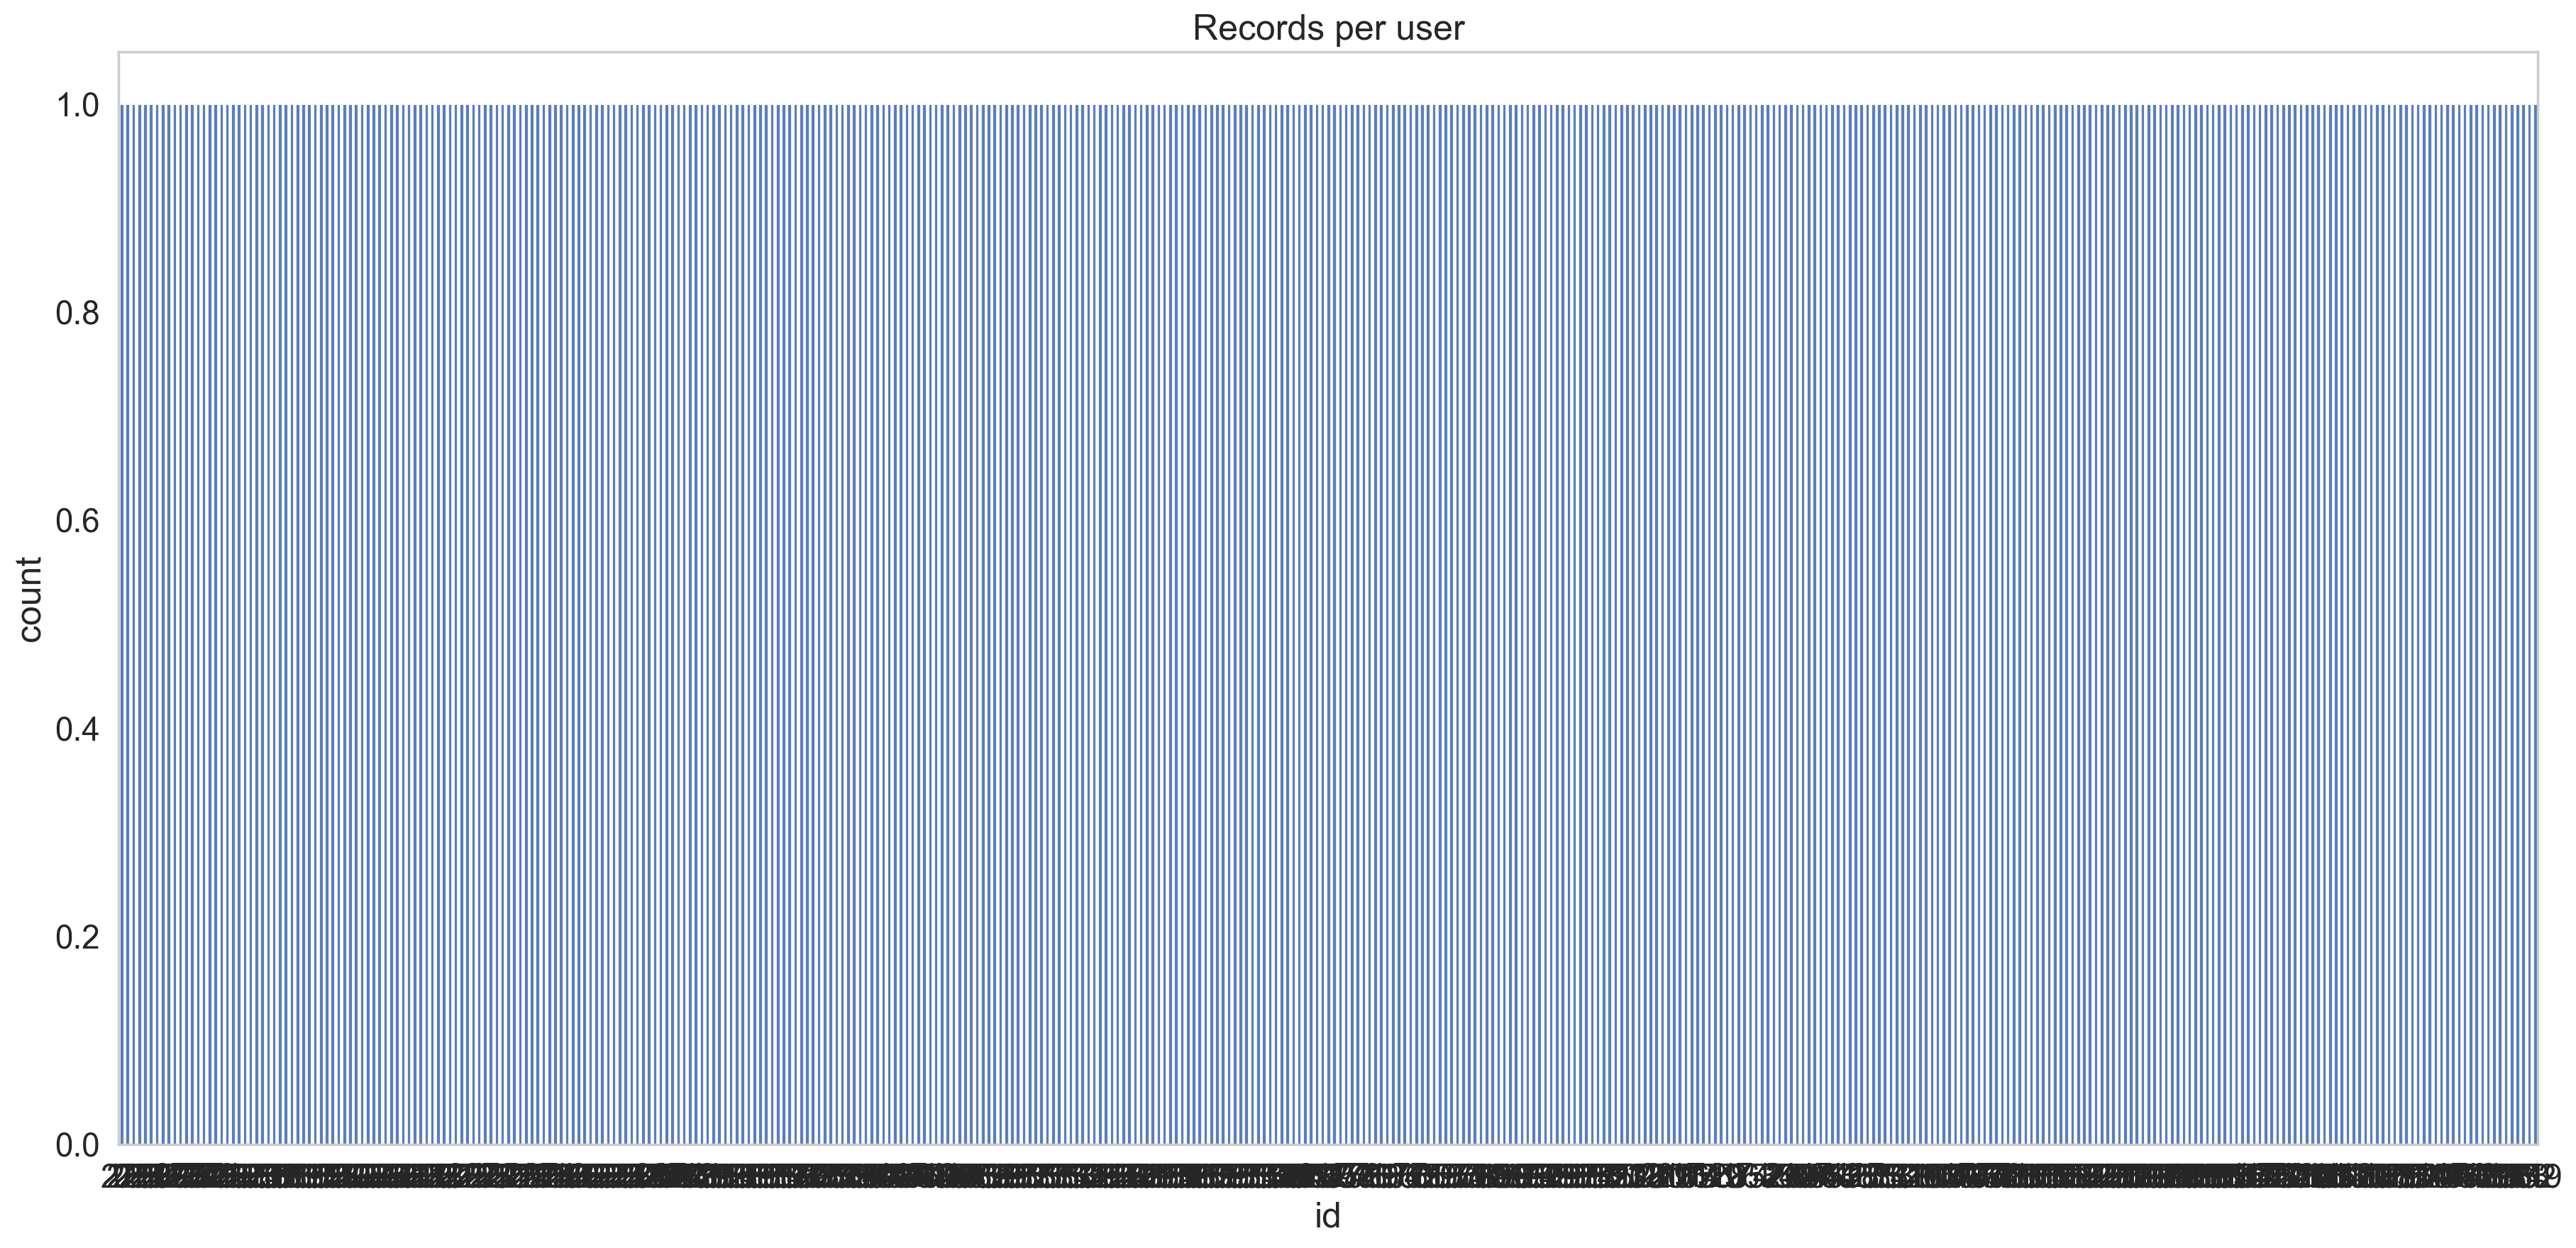

In [665]:
sns.countplot(x = 'id',
              data = df,
              palette=[sns.color_palette()[0]],
              order = df.id.value_counts().index);
plt.title("Records per user");

In [666]:
df_train = df[df['id'] <= 372]
df_test = df[df['id'] > 372]

In [667]:
from sklearn.preprocessing import RobustScaler

scale_columns = ['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']

scaler = RobustScaler()
scaler.fit(df_train[scale_columns])



df_train.loc[:, scale_columns] = scaler.transform(df_train[scale_columns].to_numpy())
df_test.loc[:, scale_columns] = scaler.transform(df_test[scale_columns].to_numpy())

c:\Users\ardon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
c:\Users\ardon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [668]:
described = df_train.describe()
for col in described.columns:
    described[col] = described[col].apply(int)
described

id  huml  humw  ulnal  ulnaw  feml  femw  tibl  tibw  tarl  tarw  \
count  369   369   369    369    369   369   369   369   369   369   369   
mean   185     0     0      0      0     0     0     0     0     0     0   
std    108     0     0      0      0     0     0     0     0     0     1   
min      0     0     0      0      0     0     0    -1     0     0     0   
25%     92     0     0      0      0     0     0     0     0     0     0   
50%    185     0     0      0      0     0     0     0     0     0     0   
75%    279     0     0      0      0     0     0     0     0     0     0   
max    372     5     3      5      3     3     3     3     3     4     5   

       type  type_shifted  id_shifted  type_block  
count   369           368         368         369  
mean      2             2         185         185  
std       1             1         107         106  
min       0             0           0           1  
25%       2             2          91          93  
50%       3             3         184         185  
75%       3             3         278         277  
max       5             5         371         369

In [669]:
df.head()


id   huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw  type  \
0   0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84     3   
1   1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01     3   
2   2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34     3   
3   3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41     3   
4   4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13     3   

   type_shifted  id_shifted  type_change  type_block  
0           NaN         NaN         True           1  
1           3.0         0.0         True           2  
2           3.0         1.0         True           3  
3           3.0         2.0         True           4  
4           3.0         3.0         True           5

In [670]:
def create_dataset(df, time_steps):
    Xs, ys = [], []
    # Iterate over each unique block identified by user_id and activity_block
    for _, group in df.groupby(['id', 'type_block']):
        # Check the number of full batches in the group
        full_batches = len(group) // time_steps
        if full_batches == 0:
            continue  # Skip this block if there aren't enough data points

        # Process each full batch
        for i in range(full_batches):
            start_idx = i * time_steps
            end_idx = start_idx + time_steps
            v = group.iloc[start_idx:end_idx][['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']].values  # Extract the features

            # Since all entries in a block are guaranteed to be the same activity, we can take the first one
            type_label = group['type'].iloc[start_idx]

            Xs.append(v)
            ys.append(type_label)

    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [671]:
from sklearn.model_selection import train_test_split

TIME_STEPS = 1

X, y = create_dataset(df, TIME_STEPS)

# Evenly distributing the data based on activity count
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [672]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(330, 1, 10) (330, 1)
(83, 1, 10) (83, 1)


In [673]:
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

enc = enc.fit(y_train)

y_train_encoded = enc.transform(y_train)
y_test_encoded = enc.transform(y_test)

print("One-Hot Encoded y_train:\n", y_train_encoded)
print("One-Hot Encoded y_test:\n", y_test_encoded)

One-Hot Encoded y_train:
 [[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
One-Hot Encoded y_test:
 [[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.

In [674]:
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau
EarlyStopping = tf.keras.callbacks.EarlyStopping
Conv1D =  tf.keras.layers.Conv1D
MaxPooling1D =  tf.keras.layers.MaxPooling1D

model = Sequential()

# 1D Convolutional layer for feature extraction
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=[X_train.shape[1], X_train.shape[2]]))
model.add(MaxPooling1D(pool_size=1))

model.add(Bidirectional(
    LSTM(units=128, return_sequences=True)
    # input_shape=[X_train.shape[1], X_train.shape[2]]
))

model.add(Bidirectional(
    LSTM(units=128)
))

model.add(Dropout(rate=0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)
# Dynamically adjust the learning rate during training to prevent getting stuck in local minima
# Configure the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   # It keeps track of a specified metric  during training epochs.
    factor=0.1,
    patience=15,         #  If the metric doesn't improve for a certain number of epochs learning rate will be reduced
    min_lr=0.0001,       # Lower bound on the learning rate
    verbose=1
)
# Prevent training from continuing unnecessarily when the model isn't improving on the validation se
# Configure the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,         # Number of epochs with no improvement after which learning rate will be reduced
    restore_best_weights=True,
    verbose=1
)


In [682]:
history = model.fit(
    X_train, y_train_encoded,
    epochs=100,
    batch_size=35,
    validation_split=0.1,
    callbacks=[reduce_lr, early_stopping],  # Add callbacks here
    verbose=1,
    shuffle=True
)

Epoch 1/100
9/9 [==============================] - 0s 22ms/step - loss: 0.1488 - acc: 0.9562 - val_loss: 0.0999 - val_acc: 0.9697 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 0s 12ms/step - loss: 0.1391 - acc: 0.9529 - val_loss: 0.1043 - val_acc: 0.9394 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 0s 13ms/step - loss: 0.1097 - acc: 0.9562 - val_loss: 0.0730 - val_acc: 1.0000 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 0.1172 - acc: 0.9529 - val_loss: 0.0473 - val_acc: 1.0000 - lr: 0.0010
Epoch 5/100
9/9 [==============================] - 0s 15ms/step - loss: 0.1231 - acc: 0.9562 - val_loss: 0.1693 - val_acc: 0.9091 - lr: 0.0010
Epoch 6/100
9/9 [==============================] - 0s 15ms/step - loss: 0.1135 - acc: 0.9596 - val_loss: 0.0796 - val_acc: 0.9697 - lr: 0.0010
Epoch 7/100
9/9 [==============================] - 0s 19ms/step - loss: 0.1265 - acc: 0.9529 - val_loss: 0.1551 - val_acc: 0.9091 - lr: 0.0010

In [683]:
model.evaluate(X_test, y_test_encoded)

3/3 [==============================] - 0s 4ms/step - loss: 0.4376 - acc: 0.8916


[0.43764427304267883, 0.891566276550293]

In [677]:
y_pred = model.predict(X_test)

y_pred_np = np.array(y_pred)


3/3 [==============================] - 1s 3ms/step


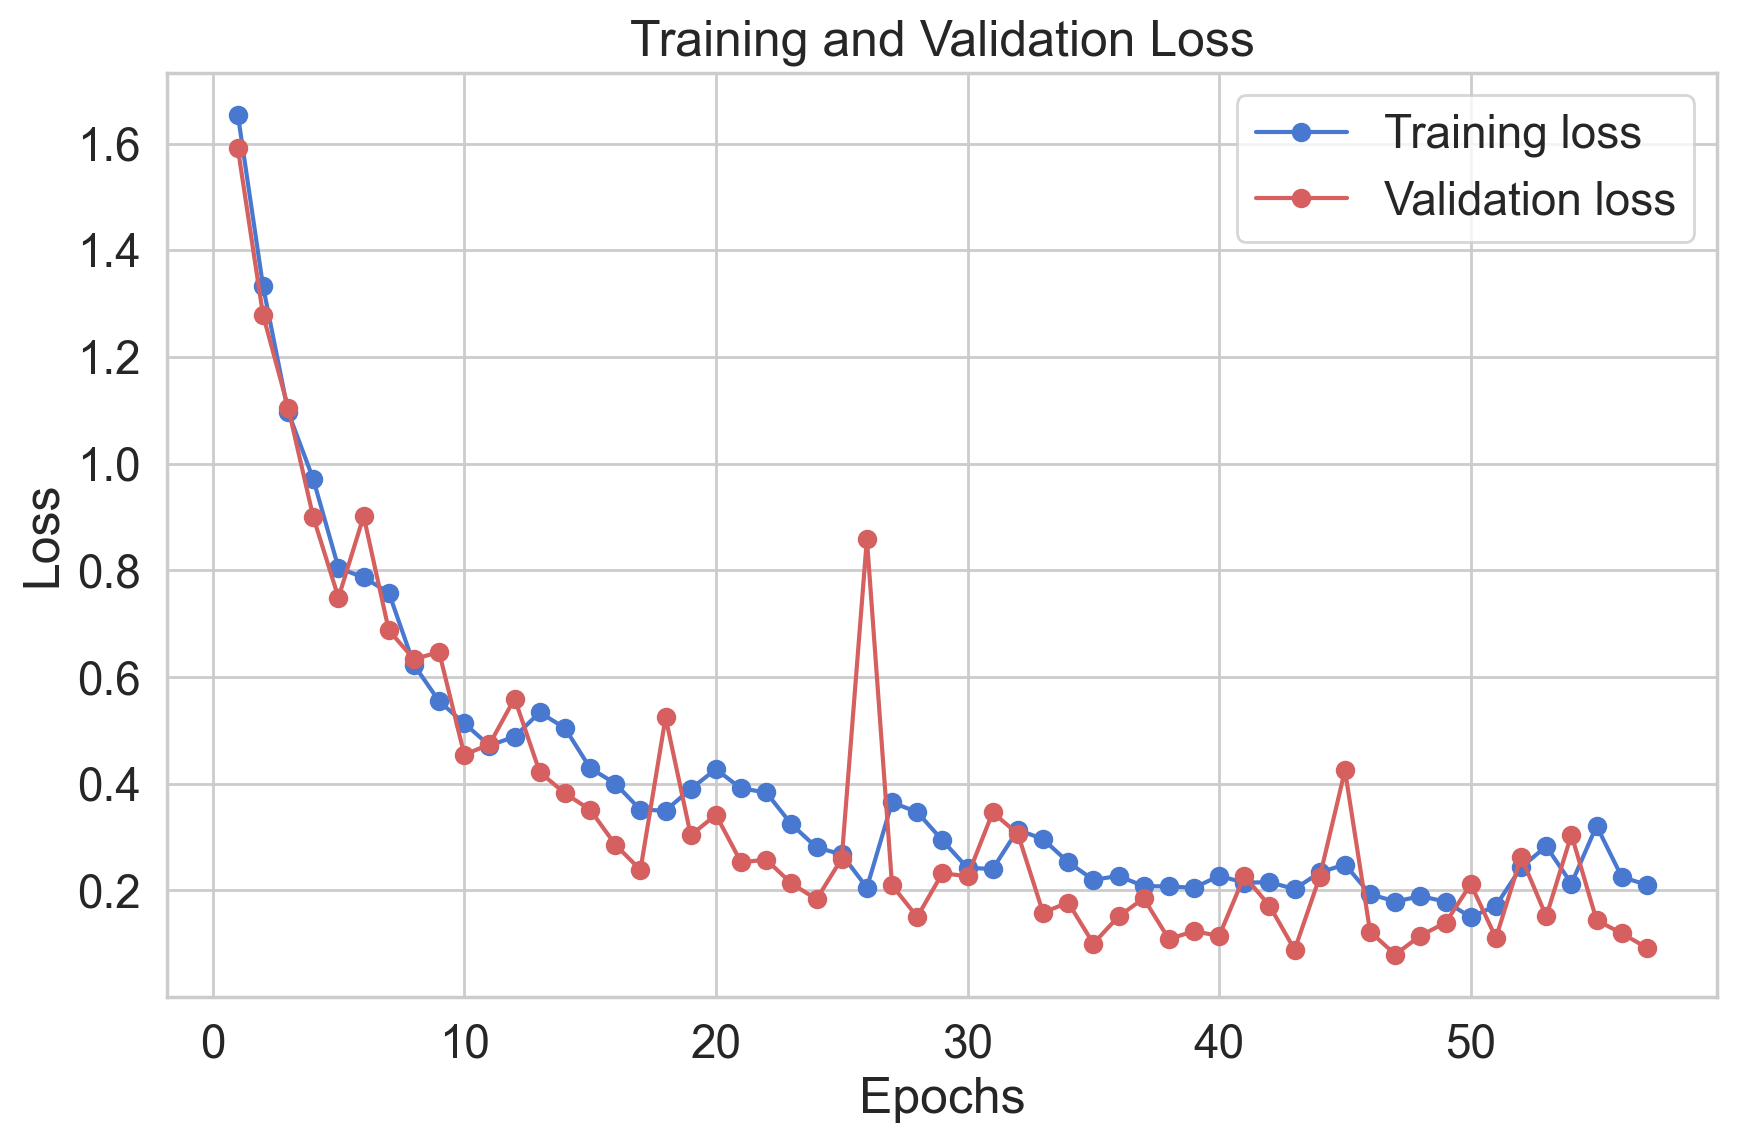

In [678]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Training loss')  # 'bo-' gives blue color with dot and solid line
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')  # 'ro-' gives red color with dot and solid line
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

SW: Swimming Birds
W: Wading Birds
T: Terrestrial Birds
R: Raptors
P: Scansorial Birds
SO: Singing Birds

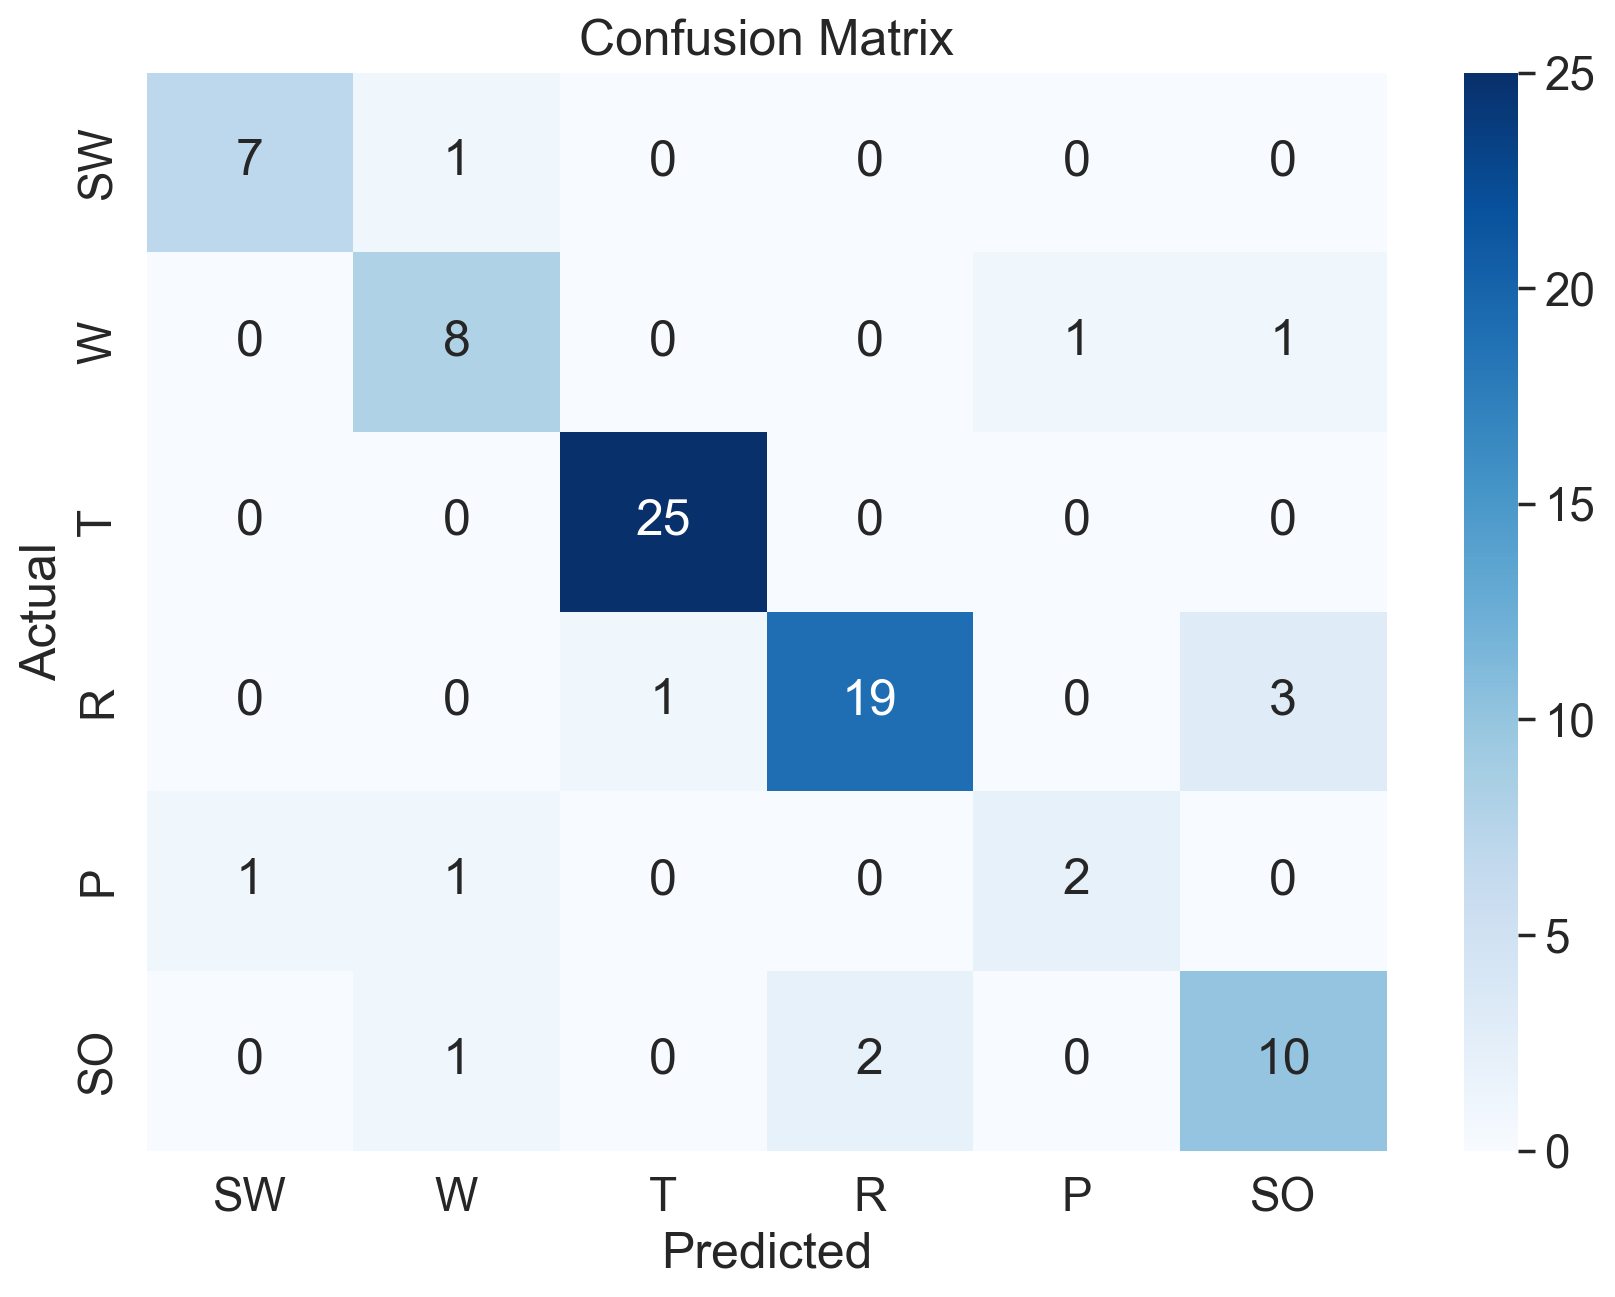

In [679]:
classes = ['SW', 'W', 'T', 'R', 'P', 'SO']

y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=classes, yticklabels=classes
    )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model perfomed well in identifying the Terrestrial Birds and the Raptors

In [680]:
import pickle
import joblib

In [681]:
# Create bird-classifier.pkl
pickle.dump(model,open('bird-classifier.pkl','wb'))